# **SARS-CoV2 and Healthy Diet**  
###A Big Data Analytics Project

---

This project is an attempt to find some relationship between the coronavirus and the type of diets humans take throughout the world. As we can observe that the effect of covid is not uniform among the countries. Some countries have high infection rates and low fatality rates such as India and some other countries have high infection and mortality rates. In this notebook, we are going to apply some big data tools and techniques to understand the virus more vividly and try to uncover some hidden relations. The aim is to determine some correlations between different metrics which can be considered for further deep-dive research.

##**Methodology**
We will perform the analysis in the following data flow:


*   Problem Definition
*   Data Exploration
*   Data cleaning and Processing
*   Features Selection
*   Features Engineering
*   Dimensionality Reduction
*   Scalling 
*   Model selection and Training
*   Model evaluations
*   Results Visualizations
*   Conclusion

# **Datasets**

Covid 19 Dataset can be available at [here](https://github.com/CSSEGISandData/COVID-19)

https://github.com/CSSEGISandData/COVID-19 In case link is not working.

Food and Nutrition Dataset can be downloaded from [FAO website](http://www.fao.org/faostat/en/#data/CC)

# **Problem Definition**
The database we have contains different type of food, obesity, world population, undernourishment rate and pandemic cases metrics. The data is available in the form of csv files. The purpose of the project is to do some analysis on the eating habbits of people among the countries and their impact onthe behaviour of the virus. We have seen inequality in the impact of covid and the reason behind it is unknown. There could be many reasons behind that but here we are going to pick one reason for the ineuqality and find its validity and significance.

### **Import required libraries**
We require some important libraries for machine learning models, data processing, loading, and visualizations. Few libraries are Plotly and matplotlib for visualization, Pandas for data processing, Pyspark for data manipulation and algorithms, re for regular expressions, and many more.

In [0]:
import numpy as np 
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [0]:
!apt install libkrb5-dev


Reading package lists... 0%Reading package lists... 0%Reading package lists... 0%Reading package lists... 6%Reading package lists... 6%Reading package lists... 6%Reading package lists... 6%Reading package lists... 49%Reading package lists... 58%Reading package lists... 58%Reading package lists... 59%Reading package lists... 59%Reading package lists... 69%Reading package lists... 69%Reading package lists... 71%Reading package lists... 71%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 90%Reading package lists... 90%Reading package lists... 91%Reading package lists... 91%Reading package lists... 98%Reading package lists... 98%Reading package lists... 98%Reading package lists... 98%Reading package lists... 99%Reading package lists... 99%Reading package lists... Done
Building dependency tree... 0%Building dependency tree... 0%Building dependency tree... 50%Building dependency tree... 50%Building dependency tree... 62%Building dependency tree 
Reading state information... 0%Reading state information... 0%Reading state information... Done
The following packages were automatically installed and are no longer required:
 libcap2-bin libpam-cap
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
 comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
 libkdb5-9
Suggested packages:
 doc-base krb5-doc krb5-user
The following NEW packages will be installed:
 comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
 libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 12 not upgraded.
Need to get 349 kB of archives.
After this operation, 1992 kB of additional disk space will be used.
Do you want to continue? [Y/n]

In [0]:
# #spark stuff set up
!wget https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user

# for visualizations
!pip install seaborn --user 
!pip install plotly --user 
!pip install imageio --user 
!pip install folium --user 

--2021-03-07 11:08:36-- https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
Resolving www-us.apache.org (www-us.apache.org)... 207.244.88.140
Connecting to www-us.apache.org (www-us.apache.org)|207.244.88.140|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz [following]
--2021-03-07 11:08:37-- https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224619134 (214M) [application/x-gzip]
Saving to: ‘spark-3.0.2-bin-hadoop3.2.tgz’

 spark-3.0 0%[ ] 0 --.-KB/s  spark-3.0. 0%[ ] 40.00K 120KB/s  spark-3.0.2 0%[ ] 152.00K 227KB/s  spark-3.0.2- 0%[ ] 248.00K 279KB/s  spark-3.0.2-b 0%[ ] 568.00K 485KB/s  spark-3.0.2-bi 0%[ ] 1.26M 921KB/s  spark-3.0.2-bin 1%[ ] 3.10M 1.90MB/s  spark-3.0.2-bin- 2%[ ] 4.59M 2.50MB/s  spark-3.0.2-bin-h 3%[ ] 6.85M 3.32MB/s  spark-3.0.2-bin-ha 4%[ ] 8.85M 3.85MB/s spark-3.0.2-bin-had 4%[ ] 10.52M 4.20MB/s park-3.0.2-bin-hado 5%[> ] 12.37M 4.57MB/s ark-3.0.2-bin-hadoo 6%[> ] 14.04M 4.83MB/s rk-3.0.2-bin-hadoop 7%[> ] 15.91M 5.08MB/s eta 39s k-3.0.2-bin-hadoop3 8%[> ] 17.79M 5.33MB/s eta 39s -3.0.2-bin-hadoop3. 9%[> ] 19.60M 5.81MB/s eta 39s 3.0.2-bin-hadoop3.2 10%[=> ] 21.43M 6.28MB/s eta 39s .0.2-bin-hadoop3.2. 10%[=> ] 23.37M 6.73MB/s eta 39s 0.2-bin-hadoop3.2.t 11%[=> ] 25.20M 7.49MB/s eta 31s .2-bin-hadoop3.2.tg 12%[=> ] 27.02M 7.91MB/s eta 31s 2-bin-hadoop3.2.tgz 13%[=> ] 28.85M 8.31MB/s eta 31s -bin-hadoop3.2.tgz 14%[=> ] 30.80M 8.71MB/s eta 31s bin-hadoop3.2.tgz 15%[==> ] 32.52M 8.88MB/s eta 31s in-hadoop3.2.tgz 16%[==> ] 34.29M 8.87MB/s eta 27s n-hadoop3.2.tgz 16%[==> ] 36.12M 8.88MB/s eta 27s -hadoop3.2.tgz 17%[==> ] 37.79M 8.84MB/s eta 27s hadoop3.2.tgz 18%[==> ] 39.77M 8.89MB/s eta 27s adoop3.2.tgz 19%[==> ] 41.51M 8.86MB/s eta 27s doop3.2.tgz 20%[===> ] 43.38M 8.88MB/s eta 24s oop3.2.tgz 21%[===> ] 45.15M 8.87MB/s eta 24s op3.2.tgz 22%[===> ] 47.16M 8.93MB/s eta 24s p3.2.tgz 22%[===> ] 48.79M 8.92MB/s eta 24s 3.2.tgz 23%[===> ] 50.57M 8.91MB/s eta 24s .2.tgz 24%[===> ] 52.46M 8.94MB/s eta 22s 2.tgz 25%[====> ] 54.20M 8.92MB/s eta 22s .tgz 26%[====> ] 56.18M 8.96MB/s eta 22s tgz 27%[====> ] 57.90M 8.92MB/s eta 22s gz 27%[====> ] 59.58M 8.91MB/s eta 22s z 28%[====> ] 61.54M 8.96MB/s eta 20s  29%[====> ] 63.34M 8.96MB/s eta 20s  s 30%[=====> ] 65.16M 8.96MB/s eta 20s  sp 31%[=====> ] 66.87M 8.90MB/s eta 20s  spa 32%[=====> ] 68.63M 8.89MB/s eta 20s  spar 32%[=====> ] 70.51M 8.91MB/s eta 19s  spark 33%[=====> ] 72.34M 8.92MB/s eta 19s  spark- 34%[=====> ] 74.16M 8.93MB/s eta 19s  spark-3 35%[======> ] 75.84M 8.89MB/s eta 19s  spark-3. 36%[======> ] 77.63M 8.85MB/s eta 19s  spark-3.0 37%[======> ] 79.49M 8.97MB/s eta 17s  spark-3.0. 37%[======> ] 81.35M 8.94MB/s eta 17s  spark-3.0.2 38%[======> ] 83.18M 8.94MB/s eta 17s  spark-3.0.2- 39%[======> ] 84.84M 8.91MB/s eta 17s  spark-3.0.2-b 40%[=======> ] 86.51M 8.89MB/s eta 17s  spark-3.0.2-bi 41%[=======> ] 88.57M 8.94MB/s eta 16s  spark-3.0.2-bin 42%[=======> ] 90.43M 8.95MB/s eta 16s  spark-3.0.2-bin- 43%[=======> ] 92.15M 8.91MB/s eta 16s  spark-3.0.2-bin-h 43%[=======> ] 93.84M 8.85MB/s eta 16s  spark-3.0.2-bin-ha 44%[=======> ] 95.54M 8.85MB/s eta 16s spark-3.0.2-bin-had 45%[========> ] 97.37M 8.89MB/s eta 15s park-3.0.2-bin-hado 46%[========> ] 99.43M 8.94MB/s eta 15s ark-3.0.2-bin-hadoo 47%[========> ] 101.15M 8.92MB/s eta 15s rk-3.0.2-bin-hadoop 48%[========> ] 102.84M 8.92MB/s eta 15s k-3.0.2-bin-hadoop3 48%[========> ] 104.55M 8.86MB/s eta 15s -3.0.2-bin-hadoop3. 49%[========> ] 106.55M 8.90MB/s eta 13s 3.0.2-bin-hadoop3.2 50%[=========> ] 108.49M 8.94MB/s eta 13s .0.2-bin-hadoop3.2.

In [0]:

import plotly.express as px

In [0]:
# !apt update
# !apt install gcc python-dev libkrb5-dev

In [0]:
# create a new spark session with the user defined application name
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CovidDiet').getOrCreate()

In [0]:
# %load_ext sparkmagic.magics
#graph section
#import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
# NoSQL DB
#from pymongo import MongoClient
#from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.0.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [0]:
# from zipfile import ZipFile 
# # opening the zip file in READ mode 
# with ZipFile("CovidProjectData.zip", 'r') as zip: 
#     # printing all the contents of the zip file 
#     zip.printdir() 
  
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 

Reading covid 19 database from the csv file using the  spark.read() automatically convert the data into spark dataframe. We can also convert spark dataframe to pandas dataframe anytime by using toPandas().

In [0]:
# reading covid dataset from covid_19_data.csv file
covid = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/covid_19_data.csv")
covid_pd = covid.toPandas() #converting spark dataframe to pandas just for demonstration.

Dataset is a large one so, it is the best practice to reduce the dataset as early as possible to reduce the burden on the system. In this scenario, we do not need the day-wise data so we can group it according to countries with their cumulative sum. Also, we are going to rename the Country column to make it simple and easy to use.

Moreover, we do not have active cases in the loaded dataset. So, we need to create one by using the common formula:
Active cases = Confrimed cases - (Deaths + Recovered)
In this way, we will create a new column named Active

In [0]:
#importing pyspark sql functions to perform sql type operations on spark dataframe
import pyspark.sql.functions as psf
covid = covid.groupBy("Country/Region").agg(psf.sum("Confirmed").alias("Confirmed"), psf.sum("Deaths").alias("Deaths"), psf.sum("Recovered").alias("Recovered"))
covid = covid.withColumnRenamed("Country/Region","Country") #renaming the column
covid = covid.orderBy("Country", ascending=1)
covid = covid.withColumn("Active", (covid.Confirmed - (covid.Deaths + covid.Recovered))) #calculation of active cases
covid.show()



+-------------------+------------+---------+------------+-----------+
 Country| Confirmed| Deaths| Recovered| Active|
+-------------------+------------+---------+------------+-----------+
 Azerbaijan| 1.0| 0.0| 0.0| 1.0|
 ('St. Martin',)| 2.0| 0.0| 0.0| 2.0|
 Afghanistan| 9497206.0| 340564.0| 6834349.0| 2322293.0|
 Albania| 4933931.0| 111888.0| 2714547.0| 2107496.0|
 Algeria| 1.2523828E7| 431100.0| 8457420.0| 3635308.0|
 Andorra| 846509.0| 17133.0| 701853.0| 127523.0|
 Angola| 1689812.0| 44796.0| 912761.0| 732255.0|
Antigua and Barbuda| 26189.0| 965.0| 22303.0| 2921.0|
 Argentina|1.81064392E8|4649141.0|1.50151111E8| 2.626414E7|
 Armenia| 1.7634667E7| 304101.0| 1.3961711E7| 3368855.0|
 Aruba| 19.0| 0.0| 0.0| 19.0|
 Australia| 5634473.0| 150217.0| 4755974.0| 728282.0|
 Austria| 2.9371572E7| 484061.0| 2.4411646E7| 4475865.0|
 Azerbaijan| 1.7205043E7| 216747.0| 1.3618696E7| 3369600.0|
 Bahamas| 924619.0| 20855.0| 626938.0| 276826.0|
 Bahamas, The| 10.0| 0.0| 0.0| 10.0|
 Bahrain| 1.4745309E7| 54021.0| 1.3718332E7| 972956.0|
 Bangladesh| 7.8729853E7|1116355.0| 5.8598619E7|1.9014879E7|
 Barbados| 61087.0| 1970.0| 45887.0| 13230.0|
 Belarus| 2.4465335E7| 201427.0| 2.0838056E7| 3425852.0|
+-------------------+------------+---------+------------+-----------+
only showing top 20 rows

Now we have a limited columns number of rows. The number of rows reduced from thousands to just the number of countries in the world. We can now verify the names of the countries manually or we can use any third-party library to standardize the country names. Here, we have two sets and we need to combine both, so we need the set the name of the countries compatible or we can implement a likewise join which uses regex to match one key column to another.

In [0]:
# regex_replace to edit the name of few countries for standardization
from pyspark.sql.functions import *
covid = covid.withColumn('Country', regexp_replace('Country', 'US', 'United States of America'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Mainland China', 'China'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Venezuela', 'Venezuela (Boliva)'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Russia', 'Russian Federation'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Congo (Kinshasa)', 'Congo'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Iran', 'Iran (Islamic Republic of)'))
covid = covid.withColumn('Country', regexp_replace('Country', 'South Korea', 'Korea, South'))
covid = covid.withColumn('Country', regexp_replace('Country', 'UK', 'United Kingdom'))
covid = covid.withColumn('Country', regexp_replace('Country', 'Taiwan', 'Taiwan*'))




 

For further standardization, we are required to keep all the columns measures to the percentages so that comparisons could be easy.

In [0]:
covid.printSchema()
covid.show()

total_pop = 7800000000
import pyspark.sql.functions as f
from pyspark.sql.window import Window
# covid = covid.withColumn('Confirmed',f.col('Confirmed')/f.sum('Confirmed').over(Window.partitionBy())*100)
# covid = covid.withColumn('Deaths',f.col('Deaths')/f.sum('Deaths').over(Window.partitionBy())*100)
# covid = covid.withColumn('Recovered',f.col('Recovered')/f.sum('Recovered').over(Window.partitionBy())*100)
# covid = covid.withColumn('Active',f.col('Active')/f.sum('Active').over(Window.partitionBy())*100)

#calculating the percentages of confrimed, recovered and deaths for each country
covid = covid.withColumn('Confirmed',(f.col('Confirmed')/total_pop)*100)
covid = covid.withColumn('Deaths',(f.col('Deaths')/total_pop)*100)
covid = covid.withColumn('Recovered',(f.col('Recovered')/total_pop)*100)
covid = covid.withColumn('Active',(f.col('Active')/total_pop)*100)
covid = covid.sort("Country")
covid.show()

root
-- Country: string (nullable = true)
-- Confirmed: double (nullable = true)
-- Deaths: double (nullable = true)
-- Recovered: double (nullable = true)
-- Active: double (nullable = true)

+-------------------+------------+---------+------------+-----------+
 Country| Confirmed| Deaths| Recovered| Active|
+-------------------+------------+---------+------------+-----------+
 Azerbaijan| 1.0| 0.0| 0.0| 1.0|
 ('St. Martin',)| 2.0| 0.0| 0.0| 2.0|
 Afghanistan| 9497206.0| 340564.0| 6834349.0| 2322293.0|
 Albania| 4933931.0| 111888.0| 2714547.0| 2107496.0|
 Algeria| 1.2523828E7| 431100.0| 8457420.0| 3635308.0|
 Andorra| 846509.0| 17133.0| 701853.0| 127523.0|
 Angola| 1689812.0| 44796.0| 912761.0| 732255.0|
Antigua and Barbuda| 26189.0| 965.0| 22303.0| 2921.0|
 Argentina|1.81064392E8|4649141.0|1.50151111E8| 2.626414E7|
 Armenia| 1.7634667E7| 304101.0| 1.3961711E7| 3368855.0|
 Aruba| 19.0| 0.0| 0.0| 19.0|
 Australia| 5634473.0| 150217.0| 4755974.0| 728282.0|
 Austria| 2.9371572E7| 484061.0| 2.4411646E7| 4475865.0|
 Azerbaijan| 1.7205043E7| 216747.0| 1.3618696E7| 3369600.0|
 Bahamas| 924619.0| 20855.0| 626938.0| 276826.0|
 Bahamas, The| 10.0| 0.0| 0.0| 10.0|
 Bahrain| 1.4745309E7| 54021.0| 1.3718332E7| 972956.0|
 Bangladesh| 7.8729853E7|1116355.0| 5.8598619E7|1.9014879E7|
 Barbados| 61087.0| 1970.0| 45887.0| 13230.0|
 Belarus| 2.4465335E7| 201427.0| 2.0838056E7| 3425852.0|
+-------------------+------------+---------+------------+-----------+
only showing top 20 rows

+-------------------+--------------------+--------------------+--------------------+--------------------+
 Country| Confirmed| Deaths| Recovered| Active|
+-------------------+--------------------+--------------------+--------------------+--------------------+
 Azerbaijan|1.282051282051282E-8| 0.0| 0.0|1.282051282051282E-8|
 ('St. Martin',)|2.564102564102564E-8| 0.0| 0.0|2.564102564102564E-8|
 Afghanistan| 0.12175905128205128|0.004366205128205...| 0.08761985897435896| 0.02977298717948718|
 Albania| 0.06325552564102564|0.001434461538461...|0.034801884615384616| 0.02701917948717949|
 Algeria| 0.16056189743589744|0.005526923076923077| 0.10842846153846154| 0.04660651282051282|
 Andorra|0.010852679487179488|2.196538461538461...|0.008998115384615386|0.001634910256410...|
 Angola|0.021664256410256412|5.743076923076923E-4|0.011702064102564103|0.009387884615384616|
Antigua and Barbuda|3.357564102564102...|1.237179487179487...|2.859358974358974E-4|3.744871794871794...|
 Argentina| 2.321338358974359| 0.0596043717948718| 1.9250142435897437| 0.3367197435897436|
 Armenia| 0.22608547435897436|0.003898730769230...| 0.1789962948717949| 0.04319044871794872|
 Aruba|2.435897435897436E-7| 0.0| 0.0|2.435897435897436E-7|
 Australia| 0.07223683333333333|0.001925858974358...| 0.06097402564102564|0.009336948717948717|
 Austria| 0.3765586153846154|0.006205910256410257| 0.3129698205128205| 0.05738288461538462|
 Azerbaijan| 0.22057747435897437|0.002778807692307...| 0.17459866666666668|0.043199999999999995|
 Bahamas|0.011854089743589744|2.673717948717949E-4|0.008037666666666667|0.003549051282051282|
 Bahamas, The|1.282051282051282E-7| 0.0| 0.0|1.282051282051282E-7|
 Bahrain| 0.18904242307692307| 6.92576923076923E-4| 0.17587605128205128|0.012473794871794872|
 Bangladesh| 1.0093570897435897|0.014312243589743591| 0.7512643461538462| 0.24378049999999998|
 Barbados|7.831666666666666E-4|2.525641025641025...|5.882948717948718E-4|1.696153846153846...|
 Belarus| 0.31365814102564105|0.002582397435897436| 0.2671545641025641| 0.04392117948717949|
+-------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

Loading the nutritional datasets and converting them into spark dataframes

In [0]:
#Loading nutritional datasets and explore the data
fat_supply_df = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/Fat_Supply_Quantity_Data.csv")
food_supply_kg_df = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/Food_Supply_Quantity_kg_Data.csv")
food_supply_kcal_df = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/Food_Supply_kcal_Data.csv")
protein_supply_quantity_df = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/Protein_Supply_Quantity_Data.csv")
supply_food_data = spark.read.format("csv").options(inferSchema="true", header="true").load("/FileStore/tables/Supply_Food_Data_Descriptions.csv")

In [0]:
fat_supply_df.show(1000)
print(fat_supply_df.count())
org = fat_supply_df

+--------------------+-------------------+---------------+-----------+-----------------------+------------------------+------+-------------+-----------------------+-------+-------------+-----------------------+------+--------+------+------+-------------+----------+-----------+------------------+--------+----------------+--------------+----------+-------+--------------+----------+----------------------------+
 Country|Alcoholic Beverages|Animal Products|Animal fats|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Miscellaneous|Milk - Excluding Butter|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar Crops|Sugar & Sweeteners|Treenuts|Vegetal Products|Vegetable Oils|Vegetables|Obesity|Undernourished|Population|Unit (all except Population)|
+--------------------+-------------------+---------------+-----------+-----------------------+------------------------+------+-------------+-----------------------+-------+-------------+-----------------------+------+--------+------+------+-------------+----------+-----------+------------------+--------+----------------+--------------+----------+-------+--------------+----------+----------------------------+
 Afghanistan| 0.0| 21.6397| 6.2224| 0.0| 8.0353|0.6859| 0.0327| 0.4246| 6.1244| 0.0163| 8.2803|0.3103| 1.0452| 0.196|0.2776| 0.049| 0.098| 0.0| 0.0| 0.7513| 28.3684| 17.0831| 0.3593| 4.5| 29.8| 3.8928E7| %|
 Albania| 0.0| 32.0002| 3.4172| 0.0| 2.6734|1.6448| 0.1445| 0.6418| 8.7428| 0.017| 17.7576|0.2933| 3.1622|0.1148| 0.0| 0.051| 0.527| 0.0| 0.0| 0.9181| 17.9998| 9.2443| 0.6503| 22.3| 6.2| 2838000.0| %|
 Algeria| 0.0| 14.4175| 0.8972| 0.0| 4.2035|1.2171| 0.2008| 0.5772| 3.8961| 0.0439| 8.0934|0.1067| 1.1983|0.2698|0.1568| 0.1129| 0.2886| 0.0| 0.0| 0.8595| 35.5857| 27.3606| 0.5145| 26.6| 3.9| 4.4357E7| %|
 Angola| 0.0| 15.3041| 1.313| 0.0| 6.5545|0.1539| 1.4155| 0.3488|11.0268| 0.0308| 1.2309|0.1539| 3.9902|0.3282|0.0103| 0.7078| 0.1128| 0.0| 0.0| 0.0308| 34.701| 22.4638| 0.1231| 6.8| 25| 3.2522E7| %|
 Antigua and Barbuda| 0.0| 27.7033| 4.6686| 0.0| 3.2153|0.3872| 1.5263| 1.2177|14.3202| 0.0898| 6.6607|0.1347| 1.3579|0.0673|0.3591| 0.0449| 1.0549| 0.0| 0.0| 0.202| 22.2995| 14.4436| 0.2469| 19.1| NA| 98000.0| %|
 Argentina| 0.0| 30.3572| 3.3076| 0.0| 1.3316|1.5706| 0.1664| 0.2091|19.2693| 0.0| 5.8512|0.1878| 0.064|0.0213|0.0213| 0.111| 0.2475| 0.0| 0.0| 0.1366| 19.6449| 17.3147| 0.1878| 28.5| 4.6| 4.5377E7| %|
 Armenia| 0.0| 29.6642| 6.2619| 0.0| 2.5068|1.6196| 0.2218| 0.5468|10.8165| 0.0361| 10.4709|0.2734| 0.6602|0.0774|0.0103| 0.0567| 1.8002| 0.0| 0.0| 0.9542| 20.3384| 12.8127| 0.8717| 20.9| 4.3| 2956000.0| %|
 Australia| 0.0| 24.1099| 4.603| 0.0| 0.9908|0.7017| 0.4515| 0.4028|11.6002| 0.052| 6.5196|0.2339| 1.2929| 0.026|0.1007| 0.0422| 0.7926| 0.0| 0.0| 1.6145| 25.8901| 20.3612| 0.2144| 30.4| <2.5| 2.5754E7| %|
 Austria| 0.0| 27.8268| 12.8517| 0.0| 1.2297|1.2147| 0.4259| 0.2249| 8.1099| 0.0| 5.1497| 0.075| 1.1367| 0.012| 0.102| 0.045| 0.4439| 0.0| 0.0| 0.8398| 22.1762| 17.9323| 0.2039| 21.9| <2.5| 8914000.0| %|
 Azerbaijan| 0.0| 32.1198| 7.7987| 0.0| 5.4481|2.0197| 0.2122| 0.594|11.9993| 0.017| 9.9202|0.1612| 0.1867|0.0255| 0.017| 0.1697| 1.3663| 0.0| 0.0| 2.2573| 17.8802| 7.1538| 0.6534| 19.9| <2.5| 1.0108E7| %|
 Bahamas| 0.0| 30.2259| 4.56| 0.0| 3.6327|1.2829| 1.4991| 0.8995|17.4941| 0.3556| 5.1318| 0.258| 2.6077|0.0209|0.2719| 0.0349| 0.9343| 0.0| 0.0| 0.4532| 19.7741| 10.1659| 0.3974| 32.1| NA| 393000.0| %|
 Bangladesh| 0.0| 9.8365| 1.2369| 0.0| 6.9946|1.2664| 2.1646| 0.427| 1.8407| 0.0147| 3.2249|0.1178| 0.6332|0.5448|1.0602| 0.2209| 0.0295| 0.0147| 0.0| 0.2651| 40.1561| 29.6422| 0.3092| 3.4| 14.7| 1.69809E8| %|
 Barbados| 0.0| 25.8451| 3.9733| 0.0| 2.1187| 1.213| 1.806| 0.4636|13.1382| 0.3235| 5.6176| 0.097| 3.2616|0.2318|0.3181| 0.1078| 0.6038| 0.0| 0.0| 0.7817| 24.1576| 15.6882| 0.2534| 24.8| 3.9| 287000.0| %|
 Belarus| 0.0| 23.8181| 7.8662| 0.0| 4.8075|1.5772| 0.5151| 0.2316|11.5636| 0.0519| 2.0644|0.2316| 0.4392| 0.0|

This dataset is already converted into percentages and all the columns are of double type. Therefore, we do not reuqire any data cleaning in this case. But we do not have covid data associated with this dataset as discussed earlier. So, we are going to merge the dataset with covid with the help of join.

In [0]:

# merging covid dataset with nutrition datasets
fat_supply_df = fat_supply_df.join(covid, fat_supply_df.Country == covid.Country).select(fat_supply_df["*"],covid["Confirmed"], covid["Deaths"], covid["Recovered"], covid["Active"])
food_supply_kg_df = food_supply_kg_df.join(covid, food_supply_kg_df.Country == covid.Country).select(food_supply_kg_df["*"],covid["Confirmed"], covid["Deaths"], covid["Recovered"],covid["Active"])
food_supply_kcal_df = food_supply_kcal_df.join(covid, food_supply_kcal_df.Country == covid.Country).select(food_supply_kcal_df["*"],covid["Confirmed"], covid["Deaths"], covid["Recovered"], covid["Active"])
protein_supply_quantity_df = protein_supply_quantity_df.join(covid, protein_supply_quantity_df.Country == covid.Country).select(protein_supply_quantity_df["*"],covid["Confirmed"], covid["Deaths"], covid["Recovered"], covid["Active"])


In [0]:
# fat_supply_df = fat_supply_df.withColumn('Confirmed',f.col('Confirmed')/f.sum('Population').over(Window.partitionBy())*100)
# fat_supply_df = fat_supply_df.withColumn('Deaths',f.col('Deaths')/f.sum('Population').over(Window.partitionBy())*100)
# fat_supply_df = fat_supply_df.withColumn('Recovered',f.col('Recovered')/f.sum('Population').over(Window.partitionBy())*100)
# fat_supply_df = fat_supply_df.withColumn('Active',f.col('Active')/f.sum('Population').over(Window.partitionBy())*100)

# Data Exploration and Processing

Now we need to analyze the final data to decide which columns must be the features and to recheck if their are any anaomalies in the dataset provided that it is already a refined dataset. Drop the population column as it is of no use and print the schema of data.

In [0]:
#delete the  % column as it is of no use
food_supply_kg_df = food_supply_kg_df.drop("Unit (all except Population)")
food_supply_kg_df.printSchema()

root
-- Country: string (nullable = true)
-- Alcoholic Beverages: double (nullable = true)
-- Animal fats: double (nullable = true)
-- Animal Products: double (nullable = true)
-- Aquatic Products, Other: double (nullable = true)
-- Cereals - Excluding Beer: double (nullable = true)
-- Eggs: double (nullable = true)
-- Fish, Seafood: double (nullable = true)
-- Fruits - Excluding Wine: double (nullable = true)
-- Meat: double (nullable = true)
-- Milk - Excluding Butter: double (nullable = true)
-- Miscellaneous: double (nullable = true)
-- Offals: double (nullable = true)
-- Oilcrops: double (nullable = true)
-- Pulses: double (nullable = true)
-- Spices: double (nullable = true)
-- Starchy Roots: double (nullable = true)
-- Stimulants: double (nullable = true)
-- Sugar & Sweeteners: double (nullable = true)
-- Sugar Crops: double (nullable = true)
-- Treenuts: double (nullable = true)
-- Vegetable Oils: double (nullable = true)
-- Vegetables: double (nullable = true)
-- Vegetal Products: double (nullable = true)
-- Obesity: string (nullable = true)
-- Undernourished: string (nullable = true)
-- Population: double (nullable = true)
-- Confirmed: double (nullable = true)
-- Deaths: double (nullable = true)
-- Recovered: double (nullable = true)
-- Active: double (nullable = true)

In [0]:
food_supply_kg_df.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| <2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| <2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367|0.3907|0.1942| 1.8384| 0.0742| 3.2325| 0.0| 0.0435| 0.2779| 15.2061| 40.8722| 19.2| 8.1| 787000.0|0.008642782051282051|2.509358974358974...|0.006738423076923077|0.001653423076923...|
 Philippines| 1.9716| 0.3074| 6.7108| 0.0| 20.0498|0.3527| 2.4506| 8.5466|3.2257| 0.1045| 0.1925|0.2717| 0.5425|0.1106| 0.034| 2.8773| 0.5399| 2.3774| 0.0| 0.1838| 0.4119| 5.4481| 43.2905| 6| 13.3| 1.09581E8| 0.8052823333333334|0.015761679487179485| 0.6690771410256411| 0.12044351282051281|
 Djibouti| 0.3778| 0.0579| 5.5215| 0.0| 20.2702|0.1275| 0.4276| 3.2735|1.7428

The undernourished and obesity columns are of string type. We need to convert the column datatype to double but before that we must make sure that there is not character value in the columns. Like in the undernourished, we have greater than and smaller than signs which can throw error on typecasting a column. So, we have to replace those characters before converting them to double using regexp_replace again.

In [0]:
# replacing the <2.5 values with 2.5 and check the count of each values to verify we do not have any other anamolies left
food_supply_kg_df = food_supply_kg_df.withColumn('Undernourished', regexp_replace('Undernourished', '<2.5', '2.5'))
food_supply_kg_df.groupby('Undernourished').count().show(150)

+--------------+-----+
Undernourished|count|
+--------------+-----+
 10.7| 1|
 8.5| 2|
 2.6| 1|
 7| 1|
 29.4| 1|
 17.1| 1|
 46.7| 1|
 8.3| 1|
 11| 1|
 29| 1|
 36.8| 1|
 16.4| 1|
 37.2| 1|
 8| 1|
 2.7| 2|
 8.1| 1|
 28| 1|
 2.9| 1|
 51.3| 1|
 4.5| 1|
 17.5| 1|
 NA| 6|
 6.2| 3|
 6.5| 1|
 2.5| 44|
 7.5| 1|
 4.9| 1|
 3.4| 2|
 7.1| 2|
 5.7| 2|
 20.3| 1|
 12.9| 1|
 13.3| 1|
 17| 1|
 10.2| 1|
 37.5| 1|
 10.3| 1|
 16.1| 1|
 44.4| 1|
 3.5| 2|
 4.3| 2|
 4.8| 2|
 8.9| 1|
 11.3| 1|
 12.6| 1|
 9.5| 1|
 5.6| 1|
 26.4| 1|
 4.6| 1|
 41| 1|
 7.8| 1|
 9.9| 1|
 25| 1|
 18.9| 1|
 20.6| 2|
 12.2| 1|
 10.1| 1|
 8.7| 1|
 25.6| 1|
 3.6| 2|
 7.9| 2|
 24.9| 1|
 2.8| 1|
 9| 2|
 14.7| 1|
 3.2| 1|
 16.5| 2|
 15.2| 1|
 20| 1|
 9.7| 1|
 38.9| 1|
 3.7| 1|
 10| 1|
 27.9| 1|
 27.3| 1|
 9.3| 1|
 5.5| 2|
 6.3| 2|
 10.4| 1|
 14.5| 1|
 6.8| 1|
 20.1| 1|
 13.4| 2|
 59.6| 1|
 29.8| 1|
 7.2| 1|
 3.9| 2|
 13.1| 1|
 10.5| 1|
 49.3| 1|
+--------------+-----+

Now, we are good to change the datatype of both the columns, i.e. Undernourished and Obesity to double using the cast method

In [0]:
food_supply_kg_df = food_supply_kg_df.withColumn("Undernourished", col("Undernourished").cast('double'))
food_supply_kg_df = food_supply_kg_df.withColumn("Obesity", col("Obesity").cast('double'))
food_supply_kg_df.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367|0.3907|0.1942| 1.8384| 0.0742| 3.2325| 0.0| 0.0435| 0.2779| 15.2061| 40.8722| 19.2| 8.1| 787000.0|0.008642782051282051|2.509358974358974...|0.006738423076923077|0.001653423076923...|
 Philippines| 1.9716| 0.3074| 6.7108| 0.0| 20.0498|0.3527| 2.4506| 8.5466|3.2257| 0.1045| 0.1925|0.2717| 0.5425|0.1106| 0.034| 2.8773| 0.5399| 2.3774| 0.0| 0.1838| 0.4119| 5.4481| 43.2905| 6.0| 13.3| 1.09581E8| 0.8052823333333334|0.015761679487179485| 0.6690771410256411| 0.12044351282051281|
 Djibouti| 0.3778| 0.0579| 5.5215| 0.0| 20.2702|0.1275| 0.4276| 3.2735|1.74

In this section, we are going to verify the entire database for the missing values, null values, Nan. After that our data cleaning will be finished.

In [0]:
# Count of all the Nan and null values in the columns.
from pyspark.sql.functions import col,sum
food_supply_kg_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in food_supply_kg_df.columns)).show() 
food_supply_kg_df.select([count(when(isnan(c), c)).alias(c) for c in food_supply_kg_df.columns]).show()

+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer|Eggs|Fish, Seafood|Fruits - Excluding Wine|Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population|Confirmed|Deaths|Recovered|Active|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 1| 6| 0| 0| 0| 0| 0|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+

+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer|Eggs|Fish, Seafood|Fruits - Excluding Wine|Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population|Confirmed|Deaths|Recovered|Active|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+

As shown above, we have few columns which has null and Nan values. We are going to drop those rows provided that the dropped rows are not significant countries which has high rate of infections

In [0]:
# counting Nan and Null values for each column
food_supply_kg_df = food_supply_kg_df.na.drop()
food_supply_kg_df.select([count(when(isnan(c), c)).alias(c) for c in food_supply_kg_df.columns]).show() #NaN for each columns
food_supply_kg_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in food_supply_kg_df.columns)).show() #Null for each columns

+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer|Eggs|Fish, Seafood|Fruits - Excluding Wine|Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population|Confirmed|Deaths|Recovered|Active|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+

+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer|Eggs|Fish, Seafood|Fruits - Excluding Wine|Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population|Confirmed|Deaths|Recovered|Active|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-------+-------------------+-----------+---------------+-----------------------+------------------------+----+-------------+-----------------------+----+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+---------+------+---------+------+

In the end we can now show the summary of the data with count, mean ,standard deviation and other paramters for each column using describe method of pandas. It indicates that the data is free of anamolies and can be used in the next step of pipeline.

In [0]:
# dataframe converted to pandas and transposed to display the statistics
summary_data = food_supply_kg_df.fillna(0).toPandas()
diet_mean = summary_data.describe()
diet_mean

Out[24]:

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Confirmed,Deaths,Recovered,Active
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,1.500000e+02,1.500000e+02
mean,3.004908,0.232485,12.318428,0.014961,12.019208,0.476250,1.283641,5.505213,3.256042,6.861751,0.383473,0.193387,0.762405,0.552409,0.092679,5.306741,0.209571,2.785557,0.089366,0.119915,0.848225,6.005261,37.678124,18.790667,10.792667,4.870907e+07,7.822960e-01,0.022023,4.731704e-01,2.871026e-01
std,2.362247,0.284521,5.971743,0.137601,5.992430,0.337108,1.180219,3.186957,1.652298,5.078920,0.579858,0.165686,1.706064,0.609209,0.125953,5.427040,0.186242,1.516155,0.371000,0.146082,0.454778,3.477948,5.972001,9.504321,11.537933,1.660103e+08,2.869090e+00,0.073630,1.641673e+00,1.709901e+00
min,0.000000,0.002200,1.739100,0.000000,3.401400,0.023900,0.035000,0.659600,0.356000,0.104500,0.000000,0.001900,0.009800,0.000000,0.000000,0.679600,0.004200,0.366600,0.000000,0.000000,0.091500,0.857000,23.113200,2.100000,2.500000,7.200000e+04,9.102564e-07,0.000000,6.153846e-07,2.948718e-07
25%,0.906350,0.042675,7.281825,0.000000,7.284625,0.187575,0.530050,3.402050,1.891475,2.193450,0.028475,0.103950,0.132600,0.135025,0.017225,2.003075,0.086800,1.734675,0.000000,0.020750,0.483300,3.539400,32.869525,8.625000,2.500000,3.301000e+06,1.546379e-02,0.000229,1.059429e-02,3.087019e-03
50%,2.866150,0.121500,12.029850,0.000000,10.197500,0.460150,1.003750,4.939050,3.322050,5.881750,0.181450,0.163700,0.307500,0.325500,0.042550,3.121000,0.179600,2.581350,0.000000,0.083850,0.759950,5.028100,37.967650,21.850000,6.400000,1.058950e+07,1.180573e-01,0.001715,6.272919e-02,2.300279e-02
75%,4.744550,0.270375,17.122875,0.001400,15.767125,0.647650,1.698925,6.703875,4.319500,10.992925,0.532150,0.222575,0.628675,0.765125,0.118000,5.745875,0.271325,3.656050,0.000000,0.150875,1.079150,7.789925,42.714275,25.700000,13.375000,3.482425e+07,3.696551e-01,0.008663,2.739468e-01,8.033422e-02
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.092900,20.837800,3.663400,1.225600,12.176300,3.483800,0.662600,27.712800,1.282300,9.725900,3.067700,0.756900,2.202600,16.701900,48.258500,45.500000,59.600000,1.402385e+09,2.757127e+01,0.686910,1.464880e+01,2.043089e+01


## **Early Visualizations**

As data is cleansed, we can perform some early visualization to represent the data graphically. This step will help us understand the potential features candidate which can be used in Machine learning algorithms.

**World Average Diet**

First, we need to show the average world diet. We can display the data in the form of Pie chart as we have categorical data distributed in percentages. We need to pick the mean of all the columns from the previous section where we calculated all the statistics of the dataset. After that, we will drop the unnecessary columns like covid and health-related for this visualization.

In [0]:
diet_mean = diet_mean.iloc[1] #picking the second column of the transposed matrix calculated above
diet_mean = pd.DataFrame(diet_mean).drop(['Deaths', 'Population','Undernourished', 'Recovered', 'Confirmed', 'Active'], axis=0) #droping unnecessary columns
diet_mean = diet_mean.sort_values(by='mean', ascending=False).iloc[:11] #sorting the data

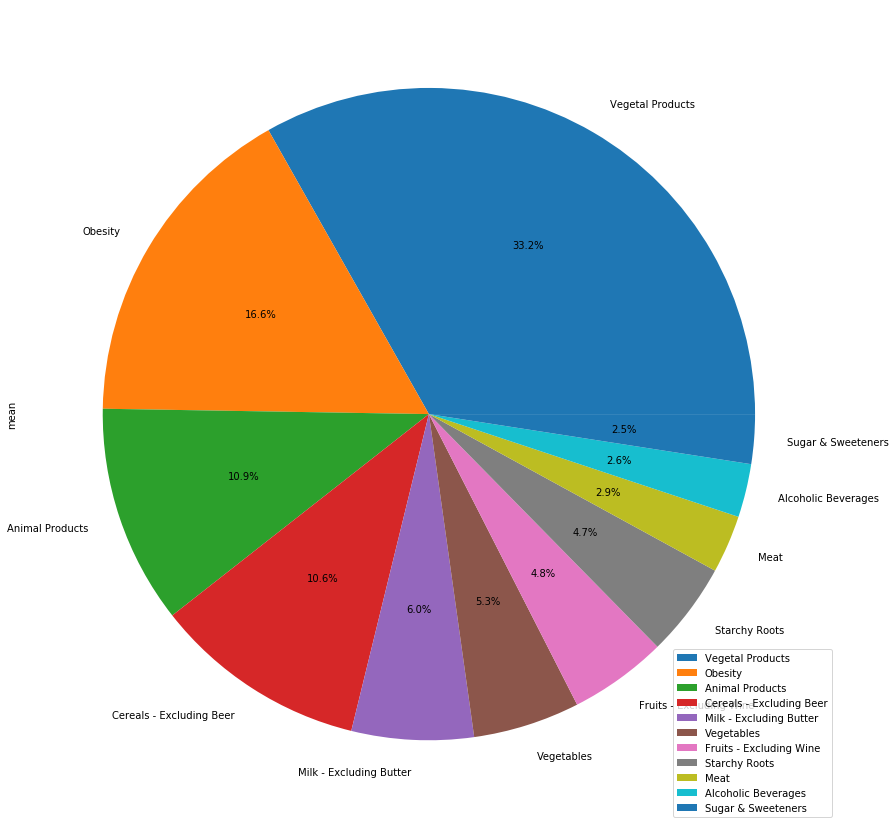

In [0]:
# plotting the pie chart using pandas pie plot method
diet_mean_plot = diet_mean.plot.pie(subplots=True, figsize=(15, 15), autopct='%1.1f%%')

We can clearly observe that Vegetal products and animal products are the most consumed food types in the world. We will need this visualization later to infer the results.

**World Covid State**

Another interesting figure is to see the average state of coronavirus in the world. We will use a scatter plot to display the results and will use Plotly to add the hover functionality to have better control over the data being displayed.

In [0]:
# scatter chart plot using Plotly
import plotly.express as px
covid_stats_plot = px.scatter(summary_data, x='Confirmed', y='Deaths', hover_name='Country', size_max=30)
covid_stats_plot.show()


The graph is plotted between the deaths and the confirmed cases and gives the sense of how countries are standing in this pandemic. We can spot the extremes, for example, United States is top among the number of cases as well as the deaths related to covid.

# **Insights**

As we have a better understanding of our data, we can now analyze the correlations especially between the obesity and the covid metrics. To do so, we need to remove the columns with minor correlations such as population and spices. We will apply the Pearson Correlation coefficient to analyze the relations between the data.

### Diet vs Covid

To find the correlation between the covid and food products, we need to create the correlation matrix. We will use pyspark Correlation module to find the required matrix. We will provide the desired columns as an input to the Correlation model and get the calculated features.

In [0]:
#importing Correlation module
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
print(food_supply_kg_df.columns)
features = ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active']
vector_col = "features"
assembler = VectorAssembler(inputCols=features, outputCol=vector_col)
df_vector = assembler.transform(food_supply_kg_df).select(vector_col) #vector assembler for required columns
matrix = Correlation.corr(df_vector, vector_col) #calculated correlated matrix

['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Population', 'Confirmed', 'Deaths', 'Recovered', 'Active']

In [0]:
# displaying matrix values
corrmatrix = matrix.collect()[0][0].toArray().tolist()
corrmatrix

Out[29]: [[1.0,
 0.4311299014244186,
 0.3475817670285112,
 0.06569824686455773,
 -0.35572741881576614,
 0.17233752963131505,
 -0.03604947105180099,
 -0.20211821982101943,
 0.31384672204252195,
 0.2781525818015509,
 -0.023246644757458707,
 -0.01782726851514863,
 -0.16540455448466526,
 -0.23425769567174123,
 -0.07852531973875154,
 0.10033440407671734,
 0.11279611647118547,
 -0.18678624960571266,
 -0.08712445113092446,
 -0.11218428886202654,
 -0.24219284379638625,
 -0.3476521916748191,
 0.15275998174240696,
 -0.18397644846321984,
 0.052059232324068797,
 0.0988083931478357,
 -0.013562040154500065,
 0.09611774253603489],
 [0.4311299014244186,
 1.0,
 0.6375689555005297,
 0.002140156763306423,
 -0.44597780595611536,
 0.27510278157941653,
 -0.036319308847678276,
 -0.21815681711951734,
 0.37511391594261967,
 0.5626787720904743,
 -0.029641666525709688,
 -0.030158747720668313,
 -0.1622300634987436,
 -0.35319653601279044,
 -0.21490014117364037,
 0.29359620177657,
 0.19552540704146848,
 -0.12957356656631475,
 0.05785985597915519,
 -0.14359313759158066,
 -0.001898478297246447,
 -0.6375027579305629,
 0.379895906727783,
 -0.3673986858793367,
 -0.004668995236462339,
 0.025346699688212255,
 -0.03353969128029418,
 0.02327570492389517],
 [0.3475817670285112,
 0.6375689555005297,
 1.0,
 -0.001794204324650035,
 -0.5585432822318314,
 0.48291414070205424,
 -0.0243497988565323,
 -0.2220432307032469,
 0.6005219483737605,
 0.9148826367089848,
 0.06809464936386674,
 0.10622797537042118,
 -0.26158410599297466,
 -0.4588529100857891,
 -0.5092518625781958,
 0.3704430426656658,
 0.24383003678248552,
 -0.11224290846001361,
 0.12058274544220085,
 -0.07498088341375005,
 0.10258888223741108,
 -0.9999996817088723,
 0.5273235275403815,
 -0.5281653642741021,
 0.18300139579700828,
 0.22005449369451838,
 0.11262674114002727,
 0.18945466119024326],
 [0.06569824686455773,
 0.002140156763306423,
 -0.001794204324650035,
 1.0,
 -0.013459243003268775,
 0.07128787483292996,
 0.1813265880917898,
 -0.04117754432804993,
 0.08107264681065533,
 -0.1034866075057364,
 -0.04752159643013847,
 0.027918893183594116,
 0.02447907120723153,
 -0.08039525212246382,
 -0.0709339473547275,
 -0.050839040957229846,
 -0.016211810805479305,
 -0.021717773428567896,
 0.022162721436357332,
 0.058530927766954316,
 0.14471297223115737,
 0.0018210964662533481,
 -0.11144698889501814,
 -0.0726626345622398,
 -0.022915400315578267,
 -0.023712898448800136,
 -0.02314701065367376,
 -0.01520588702427381],
 [-0.35572741881576614,
 -0.44597780595611536,
 -0.5585432822318314,
 -0.013459243003268775,
 1.0,
 -0.23507187580946778,
 0.034199727388427456,
 -0.28025477076960165,
 -0.40901254356440847,
 -0.49353282390139325,
 -0.07145272315600035,
 0.08847584927169311,
 -0.01672110872041147,
 0.32619286858951757,
 -0.10669986517758108,
 -0.1537824564422254,
 -0.10982134082640181,
 0.174369440347991,
 -0.07840580844427332,
 0.23244021347394195,
 -0.13240217710095592,
 0.5584574759968728,
 -0.5538999056797622,
 0.45426164119612306,
 -0.08941455962397372,
 -0.12514762833768436,
 -0.016955809343760366,
 -0.1283629640011446],
 [0.17233752963131505,
 0.27510278157941653,
 0.48291414070205424,
 0.07128787483292996,
 -0.23507187580946778,
 1.0,
 0.22787221274961003,
 -0.05261259684564447,
 0.49346477202484834,
 0.27190280254593435,
 0.06485484759922808,
 -0.0404919104721548,
 -0.21997962808106636,
 -0.3374982834252468,
 -0.44062359860998085,
 0.26031248782035316,
 0.34122120473338313,
 -0.14915940583418197,
 0.18253094957953922,
 0.14793801207355037,
 0.17530377082546453,
 -0.4828504385118489,
 0.40025097627327755,
 -0.4521973648448116,
 0.12669461792102568,
 0.18293052534094784,
 0.09616423517048199,
 0.11238016493971605],
 [-0.03604947105180099,
 -0.036319308847678276,
 -0.0243497988565323,
 0.1813265880917898,
 0.034199727388427456,
 0.22787221274961003,
 1.0,
 -0.010517228852423864,
 0.0700174253938195,
 -0.2985751989540152,
 0.39527643582906613,
 -0.09848959731646426,
 0.26077700117442565,
 -0.21518527516745867,
 -0.0795938

In [0]:
# converting this matrix into spark dataframe to perfrom further operations.
df = spark.createDataFrame(corrmatrix,features)
df.show()

+--------------------+--------------------+--------------------+-----------------------+------------------------+--------------------+--------------------+-----------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 Alcoholic Beverages| Animal fats| Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs| Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter| Miscellaneous| Offals| Oilcrops| Pulses| Starchy Roots| Stimulants| Sugar & Sweeteners| Sugar Crops| Treenuts| Vegetable Oils| Vegetables| Vegetal Products| Obesity| Undernourished| Confirmed| Deaths| Recovered| Active|
+--------------------+--------------------+--------------------+-----------------------+------------------------+--------------------+--------------------+-----------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 1.0| 0.4311299014244186| 0.3475817670285112| 0.06569824686455773| -0.35572741881576614| 0.17233752963131505|-0.03604947105180099| -0.20211821982101943| 0.31384672204252195| 0.2781525818015509|-0.02324664475745...|-0.01782726851514863|-0.16540455448466526|-0.23425769567174123|-0.07852531973875154| 0.10033440407671734| 0.11279611647118547|-0.18678624960571266|-0.08712445113092446|-0.11218428886202654|-0.24219284379638625| -0.3476521916748191| 0.15275998174240696|-0.18397644846321984|0.052059232324068797| 0.0988083931478357|-0.01356204015450...| 0.09611774253603489|
 0.4311299014244186| 1.0| 0.6375689555005297| 0.002140156763306423| -0.44597780595611536| 0.27510278157941653|-0.03631930884767...| -0.21815681711951734| 0.37511391594261967| 0.5626787720904743|-0.02964166652570...|-0.03015874772066...| -0.1622300634987436|-0.35319653601279044|-0.21490014117364037| 0.29359620177657| 0.19552540704146848|-0.12957356656631475| 0.05785985597915519|-0.14359313759158066|-0.00189847829724...| -0.6375027579305629| 0.379895906727783| -0.3673986858793367|-0.00466899523646...|0.025346699688212255|-0.03353969128029418| 0.02327570492389517|
 0.3475817670285112| 0.6375689555005297| 1.0| -0.00179420432465...| -0.5585432822318314| 0.48291414070205424| -0.0243497988565323| -0.2220432307032469| 0.6005219483737605| 0.9148826367089848| 0.06809464936386674| 0.10622797537042118|-0.26158410599297466| -0.4588529100857891| -0.5092518625781958| 0.3704430426656658| 0.24383003678248552|-0.11224290846001361| 0.12058274544220085|-0.07498088341375005| 0.10258888223741108| -0.9999996817088723| 0.5273235275403815| -0.5281653642741021| 0.18300139579700828| 0.22005449369451838| 0.11262674114002727| 0.18945466119024326|
 0.06569824686455773|0.002140156763306423|-0.00179420432465...| 1.0| -0.01345924300326...| 0.07128787483292996| 0.1813265880917898| -0.04117754432804993| 0.08107264681065533| -0.1034866075057364|-0.04752159643013847|0.027918893183594116| 0.02447907120723153|-0.08039525212246382| -0.0709339473547275|-0.05083904095722...|-0.01621181080547...|-0.02171777342856...|0.022162721436357332|0.058530927766954316| 0.14471297223115737|0.001821096466253...|-0.11144698889501814| -0.0726626345622398|-0.02291540031557...|-0.02371289844880...|-0.02314701065367376|-0.01520588702427381|
-0.35572741881576614|-0.44597780595611536| -0.5585432822318314| -0.01345924300326...| 1.0|-0.23507187580946778|0.0341

In [0]:
# correlation matrix into pandas dataframe
corr_df = pd.DataFrame(corrmatrix, index=features, columns=features)
corr_df

Out[31]:

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active
Alcoholic Beverages,1.000000,0.431130,0.347582,0.065698,-0.355727,0.172338,-0.036049,-0.202118,0.313847,0.278153,-0.023247,-0.017827,-0.165405,-0.234258,-0.078525,0.100334,0.112796,-0.186786,-0.087124,-0.112184,-0.242193,-0.347652,0.152760,-0.183976,0.052059,0.098808,-0.013562,0.096118
Animal fats,0.431130,1.000000,0.637569,0.002140,-0.445978,0.275103,-0.036319,-0.218157,0.375114,0.562679,-0.029642,-0.030159,-0.162230,-0.353197,-0.214900,0.293596,0.195525,-0.129574,0.057860,-0.143593,-0.001898,-0.637503,0.379896,-0.367399,-0.004669,0.025347,-0.033540,0.023276
Animal Products,0.347582,0.637569,1.000000,-0.001794,-0.558543,0.482914,-0.024350,-0.222043,0.600522,0.914883,0.068095,0.106228,-0.261584,-0.458853,-0.509252,0.370443,0.243830,-0.112243,0.120583,-0.074981,0.102589,-1.000000,0.527324,-0.528165,0.183001,0.220054,0.112627,0.189455
"Aquatic Products, Other",0.065698,0.002140,-0.001794,1.000000,-0.013459,0.071288,0.181327,-0.041178,0.081073,-0.103487,-0.047522,0.027919,0.024479,-0.080395,-0.070934,-0.050839,-0.016212,-0.021718,0.022163,0.058531,0.144713,0.001821,-0.111447,-0.072663,-0.022915,-0.023713,-0.023147,-0.015206
Cereals - Excluding Beer,-0.355727,-0.445978,-0.558543,-0.013459,1.000000,-0.235072,0.034200,-0.280255,-0.409013,-0.493533,-0.071453,0.088476,-0.016721,0.326193,-0.106700,-0.153782,-0.109821,0.174369,-0.078406,0.232440,-0.132402,0.558457,-0.553900,0.454262,-0.089415,-0.125148,-0.016956,-0.128363
Eggs,0.172338,0.275103,0.482914,0.071288,-0.235072,1.000000,0.227872,-0.052613,0.493465,0.271903,0.064855,-0.040492,-0.219980,-0.337498,-0.440624,0.260312,0.341221,-0.149159,0.182531,0.147938,0.175304,-0.482850,0.400251,-0.452197,0.126695,0.182931,0.096164,0.112380
"Fish, Seafood",-0.036049,-0.036319,-0.024350,0.181327,0.034200,0.227872,1.000000,-0.010517,0.070017,-0.298575,0.395276,-0.098490,0.260777,-0.215185,-0.079594,0.052763,0.089711,-0.027236,0.174011,-0.010446,-0.068634,0.024313,-0.147844,-0.170745,-0.062164,-0.052318,-0.091256,-0.014439
Fruits - Excluding Wine,-0.202118,-0.218157,-0.222043,-0.041178,-0.280255,-0.052613,-0.010517,1.000000,-0.033979,-0.225333,0.037410,-0.166382,0.183373,0.066601,0.057482,-0.111974,-0.057803,-0.022936,0.002881,-0.072195,-0.069254,0.222163,0.155082,-0.010663,-0.014939,0.004726,0.009144,-0.034049
Meat,0.313847,0.375114,0.600522,0.081073,-0.409013,0.493465,0.070017,-0.033979,1.000000,0.299407,0.180047,0.279464,-0.118370,-0.367769,-0.361002,0.266148,0.362381,-0.150022,0.099417,0.128003,-0.023992,-0.600493,0.557023,-0.386534,0.164752,0.224434,0.084022,0.186108
Milk - Excluding Butter,0.278153,0.562679,0.914883,-0.103487,-0.493533,0.271903,-0.298575,-0.225333,0.299407,1.000000,-0.070814,0.027878,-0.305115,-0.323734,-0.418735,0.306291,0.117679,-0.060040,0.057047,-0.128126,0.129933,-0.914893,0.432849,-0.409108,0.172119,0.187656,0.125280,0.160441


In [0]:
# sorting the matrix according to the highest corelated values
corr_final=corr_df.abs().unstack().sort_values(ascending = False)


In [0]:
corr_final

Out[33]: Active Active 1.000000
Pulses Pulses 1.000000
Confirmed Confirmed 1.000000
Undernourished Undernourished 1.000000
Obesity Obesity 1.000000
 ... 
Animal Products Aquatic Products, Other 0.001794
Obesity Oilcrops 0.001336
Oilcrops Obesity 0.001336
Vegetables Confirmed 0.000166
Confirmed Vegetables 0.000166
Length: 784, dtype: float64

Now we have corr_final matrix for confirmed, deaths and recovered cases. We need to segregate them and show the results through visualizations. Here,, we will fetch the correlation matrix of confirmed, deaths and recoveries seperately

In [0]:
# Filter out correlated matrix for each covid metrics
print('Confirmed')
corr_confirmed = corr_final['Confirmed'].head(18)
corr_confirmed = corr_confirmed.drop(['Recovered', 'Deaths', 'Active', 'Undernourished', 'Obesity', 'Confirmed'])
print(corr_confirmed)
print()

print('Deaths')
corr_deaths = corr_final['Deaths'].head(18)
corr_deaths = corr_deaths.drop(['Recovered', 'Confirmed', 'Active', 'Undernourished', 'Obesity', "Deaths"])
print(corr_deaths)
print()

print('Recovered')
corr_recovered = corr_final['Recovered'].head(17)
corr_recovered = corr_recovered.drop(['Confirmed', 'Deaths', 'Undernourished', 'Recovered', 'Active'])
print(corr_recovered)

Confirmed
Vegetal Products 0.183003
Animal Products 0.183001
Milk - Excluding Butter 0.172119
Meat 0.164752
Miscellaneous 0.142750
Eggs 0.126695
Offals 0.111804
Starchy Roots 0.092464
Cereals - Excluding Beer 0.089415
Treenuts 0.064902
Fish, Seafood 0.062164
Vegetable Oils 0.060219
dtype: float64

Deaths
Meat 0.224434
Animal Products 0.220054
Vegetal Products 0.220039
Milk - Excluding Butter 0.187656
Eggs 0.182931
Miscellaneous 0.149424
Cereals - Excluding Beer 0.125148
Starchy Roots 0.107886
Alcoholic Beverages 0.098808
Treenuts 0.096935
Offals 0.083264
Oilcrops 0.071758
dtype: float64

Recovered
Miscellaneous 0.153234
Milk - Excluding Butter 0.125280
Animal Products 0.112627
Vegetal Products 0.112601
Eggs 0.096164
Starchy Roots 0.093265
Sugar Crops 0.092684
Fish, Seafood 0.091256
Offals 0.088417
Meat 0.084022
Pulses 0.065021
Vegetable Oils 0.060125
dtype: float64

In [0]:
corr_base = corr_deaths + corr_confirmed + corr_recovered
corr_base

Out[35]: Alcoholic Beverages NaN
Animal Products 0.515683
Cereals - Excluding Beer NaN
Eggs 0.405789
Fish, Seafood NaN
Meat 0.473208
Milk - Excluding Butter 0.485054
Miscellaneous 0.445408
Offals 0.283484
Oilcrops NaN
Pulses NaN
Starchy Roots 0.293615
Sugar Crops NaN
Treenuts NaN
Vegetable Oils NaN
Vegetal Products 0.515643
dtype: float64

Now we can plot the matrix for death, recovered and confirmed cases using heatmap.

Out[36]:

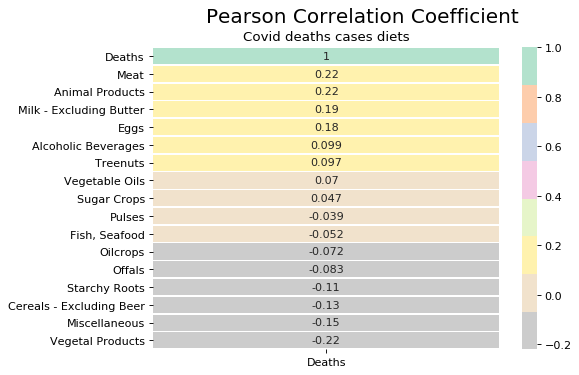

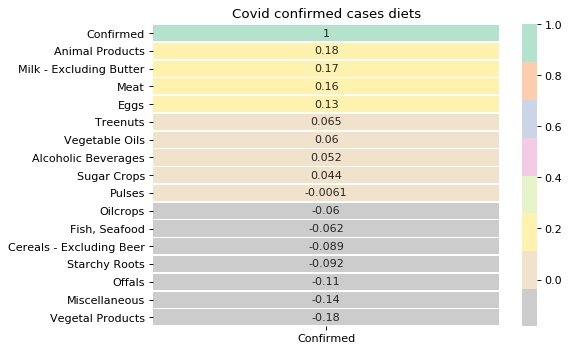

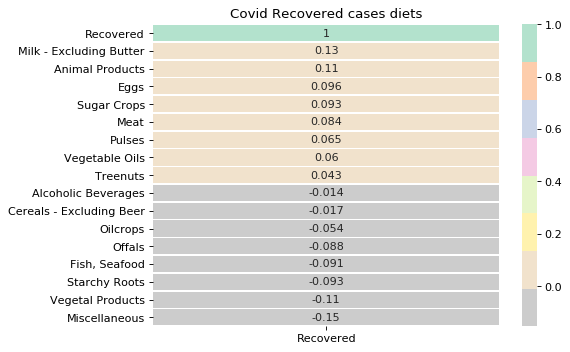

(array([0.5]), <a list of 1 Text xticklabel objects>)

In [0]:


corr_heatmap=food_supply_kg_df.select('Deaths','Animal Products','Alcoholic Beverages','Cereals - Excluding Beer','Eggs','Meat', 'Fish, Seafood', 'Milk - Excluding Butter','Miscellaneous', 'Oilcrops', 'Offals', 'Pulses','Starchy Roots','Sugar Crops', 'Treenuts', 'Vegetable Oils','Vegetal Products')
corr_heatmap = corr_heatmap.toPandas()
x=corr_heatmap.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Deaths']].sort_values(by=['Deaths'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid deaths cases diets')
plt.xticks()
plt.suptitle('Pearson Correlation Coefficient', size=18, va='top')

corr_heatmap=food_supply_kg_df.select('Confirmed','Animal Products','Alcoholic Beverages','Cereals - Excluding Beer','Eggs','Meat', 'Fish, Seafood', 'Milk - Excluding Butter','Miscellaneous', 'Oilcrops', 'Offals', 'Pulses','Starchy Roots','Sugar Crops', 'Treenuts', 'Vegetable Oils','Vegetal Products')
corr_heatmap = corr_heatmap.toPandas()
x=corr_heatmap.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Confirmed']].sort_values(by=['Confirmed'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid confirmed cases diets')
plt.xticks()


corr_heatmap=food_supply_kg_df.select('Recovered','Animal Products','Alcoholic Beverages','Cereals - Excluding Beer','Eggs','Meat', 'Fish, Seafood', 'Milk - Excluding Butter','Miscellaneous', 'Oilcrops', 'Offals', 'Pulses','Starchy Roots','Sugar Crops', 'Treenuts', 'Vegetable Oils','Vegetal Products')
corr_heatmap = corr_heatmap.toPandas()
x=corr_heatmap.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Recovered']].sort_values(by=['Recovered'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid Recovered cases diets')
plt.xticks()


From the plots we can infer that the top three food products which has direct correlation to mortality rate are Meat, Animal products and Milk without eggs.

Similarly, Case is safe for confirmed cases in which the top three factors are Meat, animal products and milk.

In the recovered cases, we can observe that Meat has slightly less correlation and slip down from top three.

### **Health State vs Covid**
Now, after having individual correlations, we can now plot all the metrics together to plot the heatmap. It will include Deaths, Confirmed, Recovered, Obesity and Undernourished.

Out[37]:

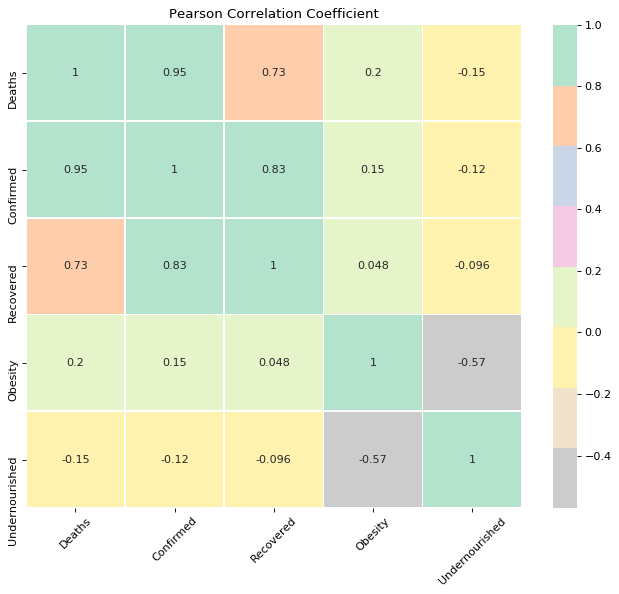

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

In [0]:
# Ploting correlation matrix between Covid data and Health State
corr_heatmap=food_supply_kg_df.select('Deaths','Confirmed','Recovered','Obesity','Undernourished')
corr_heatmap = corr_heatmap.toPandas()
x=corr_heatmap.corr(method='pearson')
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(x,cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Pearson Correlation Coefficient')
plt.xticks(rotation=45)

From this visualization we can infer that Obesity has a stronger relation  with fatility rate  and undernourished patients recovered more easily from covid as compared to obese ones.

# Features Selection

In this section, we will make attempt to find which features are important for the modeling and how selecting a feature can improve the efficacy of the ML models. First of all we will find the extreme cases of covid from both the sides from our data.

In [0]:
max_death = food_supply_kg_df.orderBy(desc("Deaths")).take(1)
max_death

Out[38]: [Row(Country='United States of America', Alcoholic Beverages=4.8647, Animal fats=0.1681, Animal Products=21.2352, Aquatic Products, Other=0.002, Cereals - Excluding Beer=5.5048, Eggs=0.786, Fish, Seafood=1.1287, Fruits - Excluding Wine=4.5432, Meat=6.2645, Milk - Excluding Butter=12.8657, Miscellaneous=0.0, Offals=0.0197, Oilcrops=0.3246, Pulses=0.1893, Spices=0.049, Starchy Roots=2.839, Stimulants=0.2458, Sugar & Sweeteners=3.32, Sugar Crops=0.0, Treenuts=0.1772, Vegetable Oils=0.9889, Vegetables=5.7249, Vegetal Products=28.7587, Obesity=37.3, Undernourished=2.5, Population=329878000.0, Confirmed=27.57127373076923, Deaths=0.6869104102564102, Recovered=6.453473794871795, Active=20.430889525641025)]

1. Country with maximum number of covid infections: **United States of America**

In [0]:
# ordering by confirmed column in descending order will provide country with maximum confirmed cases
max_confirmed = food_supply_kg_df.orderBy(desc("Confirmed")).take(1)
max_confirmed

Out[39]: [Row(Country='United States of America', Alcoholic Beverages=4.8647, Animal fats=0.1681, Animal Products=21.2352, Aquatic Products, Other=0.002, Cereals - Excluding Beer=5.5048, Eggs=0.786, Fish, Seafood=1.1287, Fruits - Excluding Wine=4.5432, Meat=6.2645, Milk - Excluding Butter=12.8657, Miscellaneous=0.0, Offals=0.0197, Oilcrops=0.3246, Pulses=0.1893, Spices=0.049, Starchy Roots=2.839, Stimulants=0.2458, Sugar & Sweeteners=3.32, Sugar Crops=0.0, Treenuts=0.1772, Vegetable Oils=0.9889, Vegetables=5.7249, Vegetal Products=28.7587, Obesity=37.3, Undernourished=2.5, Population=329878000.0, Confirmed=27.57127373076923, Deaths=0.6869104102564102, Recovered=6.453473794871795, Active=20.430889525641025)]

2. Country with maximum number of deaths due to covid: **United States of America**

In [0]:
food_supply_kg_df.orderBy( "Deaths", desc("Population")).take(1)

# food_kg[food_kg['Deaths'] == food_kg['Deaths'].min()].sort_values(by='Population', ascending=False)

Out[40]: [Row(Country='Cambodia', Alcoholic Beverages=4.5783, Animal fats=0.0377, Animal Products=6.08, Aquatic Products, Other=0.0, Cereals - Excluding Beer=24.8906, Eggs=0.131, Fish, Seafood=4.2369, Fruits - Excluding Wine=2.3184, Meat=1.2247, Milk - Excluding Butter=0.3285, Miscellaneous=0.4853, Offals=0.1211, Oilcrops=0.79, Pulses=0.4903, Spices=0.0784, Starchy Roots=3.0519, Stimulants=0.126, Sugar & Sweeteners=2.9923, Sugar Crops=0.8367, Treenuts=0.0238, Vegetable Oils=0.2511, Vegetables=3.0072, Vegetal Products=43.9195, Obesity=3.5, Undernourished=16.4, Population=15497000.0, Confirmed=0.0009111666666666666, Deaths=0.0, Recovered=0.0008307435897435897, Active=8.042307692307693e-05)]

3. Country with minimum number of confirmed cases provided with maximum population

In [0]:
  food_supply_kg_df.orderBy( "Confirmed", desc("Population")).take(1)

Out[41]: [Row(Country='Vanuatu', Alcoholic Beverages=0.2424, Animal fats=0.0793, Animal Products=6.6244, Aquatic Products, Other=0.0, Cereals - Excluding Beer=6.4102, Eggs=0.1875, Fish, Seafood=2.1649, Fruits - Excluding Wine=5.8103, Meat=2.7466, Milk - Excluding Butter=1.2692, Miscellaneous=0.2882, Offals=0.1776, Oilcrops=12.1763, Pulses=0.0008, Spices=0.0374, Starchy Roots=12.7275, Stimulants=0.0305, Sugar & Sweeteners=1.3645, Sugar Crops=0.0, Treenuts=0.0038, Vegetable Oils=0.3674, Vegetables=3.9175, Vegetal Products=43.3737, Obesity=23.5, Undernourished=7.2, Population=321000.0, Confirmed=9.102564102564104e-07, Deaths=0.0, Recovered=6.153846153846154e-07, Active=2.9487179487179483e-07)]

## Features Engineering

In this section, we will perform feature engineering with both manual ways and Machine learning automated ways. 

**Handmade Clustering**

This is a manual clustering technique in which we will create a new column with the score basis on the another column.

As we know that the mortality rate exists between 0 to 76%, we will divide it into four buckets or categories manually and give them a death score. For example, countries with a low mortality rate will have a low score, and countries with having mortality rate above 45% percent will have the highest death score.

In [0]:
# Bucketizer is used to segregate the column values into bin scores
from pyspark.ml.feature import Bucketizer
score_bins = [-0.1, 0.175, 0.35, 0.55, 0.70]
t = {-0.1:"1", 1.175: "2", 0.35:"3", 0.55: "4", 0.70: '5'}
bucketizer = Bucketizer(splits=[ -0.1, 0.0375, 0.075, 0.1125, 0.15, float('Inf') ],inputCol="Deaths", outputCol="DeathScore")
food_supply_kg_df = bucketizer.setHandleInvalid("keep").transform(food_supply_kg_df)
food_supply_kg_df.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...| 0.0|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367|0.3907|0.1942| 1.8384| 0.0742| 3.2325| 0.0| 0.0435| 0.2779| 15.2061| 40.8722| 19.2| 8.1| 787000.0|0.008642782051282051|2.509358974358974...|0.006738423076923077|0.001653423076923...| 0.0|
 Philippines| 1.9716| 0.3074| 6.7108| 0.0| 20.0498|0.3527| 2.4506| 8.5466|3.2257| 0.1045| 0.1925|0.2717| 0.5425|0.1106| 0.034| 2.8773| 0.5399| 2.3774| 0.0| 0.1838| 0.4119| 5.4481| 43.2905| 6.0| 13.3| 1.09581E8| 0.8052823333333334|0.015761679487179485| 0.6690771410256411| 0.12044351282051281| 0.

In [0]:
# number of countries lies under each death scores 
food_supply_kg_df.groupBy('DeathScore').count().show()

+----------+-----+
DeathScore|count|
+----------+-----+
 0.0| 134|
 1.0| 5|
 4.0| 6|
 3.0| 2|
 2.0| 3|
+----------+-----+

In [0]:
# plotting the scater graph of countries according to their bucket size. The darker color represent lowest death score and vice versa
covid_man_cluster_conf = px.scatter(food_supply_kg_df.toPandas(), x='Confirmed', y='Deaths', color='DeathScore', hover_name='Country', size_max=30)
covid_man_cluster_conf.show()

plotting the scater graph of countries according to their bucket size. The darker color represent lowest death score and vice versa

As we know that the mortality rate exists between 0 to 76%, we will divide it into four buckets or categories manually and give them a confirmed score. For example, countries with a low mortality rate will have a low score, and countries with having mortality rate above 45% percent will have the highest confirmed score.

In [0]:
from pyspark.ml.feature import Bucketizer
score_bins = [-0.1, 0.175, 0.35, 0.55, 0.70]
t = {-0.1:"1", 1.175: "2", 0.35:"3", 0.55: "4", 0.70: '5'}
bucketizer = Bucketizer(splits=[ -0.1, 0.175, 0.35, 0.55, 0.70, float('Inf') ],inputCol="Confirmed", outputCol="ConfirmedScore")
food_supply_kg_df = bucketizer.setHandleInvalid("keep").transform(food_supply_kg_df)
food_supply_kg_df.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...| 0.0| 0.0|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367|0.3907|0.1942| 1.8384| 0.0742| 3.2325| 0.0| 0.0435| 0.2779| 15.2061| 40.8722| 19.2| 8.1| 787000.0|0.008642782051282051|2.509358974358974...|0.006738423076923077|0.001653423076923...| 0.0| 0.0|
 Philippines| 1.9716| 0.3074| 6.7108| 0.0| 20.0498|0.3527| 2.4506| 8.5466|3.2257| 0.1045| 0.1925|0.2717| 0.5425|0.1106| 0.034| 2.8773| 0.5399| 2.3774| 0.0| 0.1838| 0.4119| 5.4481| 43.2905| 6.0| 13.3| 1.09581E8|

In [0]:
food_supply_kg_df.groupBy('ConfirmedScore').count().show()

+--------------+-----+
ConfirmedScore|count|
+--------------+-----+
 0.0| 89|
 1.0| 22|
 4.0| 28|
 3.0| 2|
 2.0| 9|
+--------------+-----+

In [0]:
covid_man_cluster_conf = px.scatter(food_supply_kg_df.toPandas(), x='Confirmed', y='Deaths', color='ConfirmedScore', hover_name='Country', size_max=30)
covid_man_cluster_conf.show()

plotting the scater graph of countries according to their bucket size. The darker color represent lowest confirmed score and vice versa

# Unsupervised Learning

In [0]:
food_kg_drop = food_supply_kg_df

First step is to create vectors column for all the features selected and scale them with pyspark StandardScaler module to reduce the dimensionality.

In [0]:
# vector assembler for the given set of features
features = ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active']
vector_col = "features"
assembler = VectorAssembler(inputCols=features, outputCol=vector_col)
food_kg_drop = assembler.transform(food_kg_drop)
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...| 0.0| 0.0|[3.9814,0.0363,9....|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367|0.3907|0.1942| 1.8384| 0.0742| 3.2325| 0.0| 0.0435| 0.2779| 15.2061| 40.8722| 19.2| 8.1| 787000.0|0.008642782051282051|2.509358974358974...|0.006738423076923077|0.001653423076923...| 0.0| 0.0|[1.8708,0.02

Here we will scale the features calculated above with features as an input column and scaledFeatures as output column. This will decrease the dimensionality and increase the output accuracy of the ML algorithms.

In [0]:
# scaling the calculated fearures above
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(food_kg_drop)

# Normalize each feature to have unit standard deviation.
food_kg_drop = scalerModel.transform(food_kg_drop)
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...| 0.0| 0.0|[3.9814,0.0363,9....|[1.68542952604306...|
 Guyana| 1.8708| 0.0206| 9.1155| 0.0| 9.7847|0.1038| 1.7011| 5.7954|2.5237| 4.7277| 0.3516|0.0385| 1.8367

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Country", outputCol="CountryIndex")
food_kg_drop = indexer.fit(food_kg_drop).transform(food_kg_drop)
food_kg_drop 

Out[51]: DataFrame[Country: string, Alcoholic Beverages: double, Animal fats: double, Animal Products: double, Aquatic Products, Other: double, Cereals - Excluding Beer: double, Eggs: double, Fish, Seafood: double, Fruits - Excluding Wine: double, Meat: double, Milk - Excluding Butter: double, Miscellaneous: double, Offals: double, Oilcrops: double, Pulses: double, Spices: double, Starchy Roots: double, Stimulants: double, Sugar & Sweeteners: double, Sugar Crops: double, Treenuts: double, Vegetable Oils: double, Vegetables: double, Vegetal Products: double, Obesity: double, Undernourished: double, Population: double, Confirmed: double, Deaths: double, Recovered: double, Active: double, DeathScore: double, ConfirmedScore: double, features: vector, scaledFeatures: vector, CountryIndex: double]

In [0]:
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...| 26.0|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...| 113.0|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...| 107.0|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...| 147.0|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...| 119.0|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...| 130.0|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.018677820512820513|1.872692307692308E-4| 0.01656880769230769|0.001921743589743...| 0.0| 0.0|[3.9814,0.0363,9....|[1.68542952604306...| 21.0|
 Guyana| 1.8708| 0.

In [0]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(dropLast=False, inputCol="CountryIndex", outputCol="CountryVec")
ohe = encoder.fit(food_kg_drop)
food_kg_drop = ohe.transform(food_kg_drop)
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex| CountryVec|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...| 26.0| (150,[26],[1.0])|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...| 113.0|(150,[113],[1.0])|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...| 107.0|(150,[107],[1.0])|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...| 147.0|(150,[147],[1.0])|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...| 119.0|(150,[119],[1.0])|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...| 130.0|(150,[130],[1.0])|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.0186

In [0]:
food_kg_drop.select("CountryVec").count()

Out[54]: 150

In [0]:
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex| CountryVec|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...| 26.0| (150,[26],[1.0])|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...| 113.0|(150,[113],[1.0])|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...| 107.0|(150,[107],[1.0])|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...| 147.0|(150,[147],[1.0])|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...| 119.0|(150,[119],[1.0])|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...| 130.0|(150,[130],[1.0])|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.0186

## K-means Clustering

Here we will make some attempts to cluster the data with the help of Machine learning rather than manually. We will check the Silhouette score with multiple iterations of the Kmeans algorithm to properly find the correct place of centroids. If we find stability in the score, we will have good clustered data otherwise unsupervised clustering is not possible on the given data.

After the featuring, scaling and encoding, our data is ready to get train on the dataset and predict the results as features column.

In [0]:
# training and transforming data on K means clustering
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=5, seed=1, featuresCol="scaledFeatures", predictionCol = "prediction")  
model = kmeans.fit( food_kg_drop)


In [0]:
food_kg_drop = model.transform(food_kg_drop)
food_kg_drop.show()   

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+----------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex| CountryVec|prediction|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+----------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...| 26.0| (150,[26],[1.0])| 3|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...| 113.0|(150,[113],[1.0])| 0|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...| 107.0|(150,[107],[1.0])| 2|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...| 147.0|(150,[147],[1.0])| 3|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...| 119.0|(150,[119],[1.0])| 3|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...| 130.0|(150,[130],[1.0])| 0|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0

In [0]:
# cluster centers obtained for the given dataset
model.clusterCenters()

Out[58]: [array([1.80935941, 1.63520624, 3.0643873 , 0.01595981, 1.29661621,
 1.83886512, 0.77887665, 1.37039927, 2.41725401, 2.38355797,
 0.37865258, 1.16646246, 0.11424184, 0.28501135, 0.641795 ,
 1.4636048 , 1.94240535, 0.09529617, 0.96534866, 1.60321998,
 2.02406932, 5.30755923, 2.57261714, 0.31643279, 0.25493015,
 0.35921816, 0.24070425, 0.18118642]),
 array([1.35456863e+00, 1.56587582e+00, 3.01156631e+00, 1.78051606e-02,
 1.23916334e+00, 2.29637114e+00, 4.11559177e+00, 1.65287751e+00,
 2.43418586e+00, 1.52813495e+00, 4.91460887e+00, 7.31503539e-01,
 2.29885830e-01, 4.42336151e-01, 4.84707143e-01, 2.03042554e+00,
 2.23027939e+00, 6.75201721e-02, 1.73926849e+00, 1.31162784e+00,
 1.49448755e+00, 5.36101267e+00, 2.12534898e+00, 4.16019044e-01,
 9.50253896e-03, 4.13811466e-03, 1.07293407e-02, 5.46516372e-03]),
 array([0.90886495, 0.45663276, 1.87281204, 0.32992473, 2.13901127,
 1.78021925, 1.18094322, 2.13095789, 2.25121011, 1.00618792,
 0.93726104, 1.11630652, 0.50306862, 1.00981684, 0.56244329,
 1.09076325, 2.4284322 , 0.03769481, 0.90030131, 2.41029482,
 1.94163527, 6.4989192 , 2.33166245, 0.73180162, 0.11834776,
 0.12439358, 0.16893545, 0.03102789]),
 array([1.02860174e+00, 2.24274503e-01, 1.01259818e+00, 5.07139003e-03,
 2.74250489e+00, 4.85214181e-01, 1.10063389e+00, 1.72922947e+00,
 1.11069828e+00, 4.86000715e-01, 3.72032649e-01, 1.30638565e+00,
 7.85046119e-01, 1.49673506e+00, 1.83628648e+00, 7.06538457e-01,
 1.10267897e+00, 5.77006542e-01, 4.98232797e-01, 1.63578477e+00,
 1.21130395e+00, 7.35941363e+00, 9.33213930e-01, 1.89469543e+00,
 5.22845294e-02, 5.65837062e-02, 7.23419122e-02, 1.58377858e-02]),
 array([1.32973704e+00, 5.28607202e-01, 2.78633894e+00, 4.84494167e-03,
 1.74198103e+00, 1.57842607e+00, 6.68943590e-01, 1.68081952e+00,
 2.64256234e+00, 2.11306083e+00, 3.44912063e-04, 4.06390855e-01,
 3.44242601e-01, 1.46944734e+00, 5.54353766e-01, 1.11593312e+00,
 1.72422966e+00, 9.08445057e-01, 8.69605722e-01, 2.21345902e+00,
 1.58649104e+00, 5.58546423e+00, 2.22354992e+00, 5.63359123e-01,
 6.67032832e+00, 6.06798256e+00, 6.60536677e+00, 4.58923634e+00])]

It is important to calculate the accuracy of any trained model before relying on its results. Here we will find out what is the efficacy of the K-means clustering on the given dataset.

In [0]:
# now we will evaluate the performance of the clustering model with ClustertringEvaluator
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaledFeatures', metricName='silhouette', distanceMeasure='squaredEuclidean')
silhouette = evaluator.evaluate(food_kg_drop)
silhouette

Out[59]: 0.22767586282885502

We noticed that the silhouette score is very low but we need to find the silhoutte score for different values of K ranging from 2 to 10 to determine where the accruacy is maximum or do we have stability in the centroid points.

For this purpose, we will run a K means clustering in the loop for k=2 to 10 and plot the silhouette score of each interation and verify the results.

In [0]:
# Kmeans implementation for different values of K
food_kg_drop = food_kg_drop.drop("prediction")
silhouette_score = []
for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='features', k=i) 
    KMeans_fit=KMeans_algo.fit(food_kg_drop) 
    output=KMeans_fit.transform(food_kg_drop)
    evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.5784733752468552
Silhouette Score: 0.3758242190169378
Silhouette Score: 0.4164504189866632
Silhouette Score: 0.38587543950952413
Silhouette Score: 0.33489527889711745
Silhouette Score: 0.43158289600213057
Silhouette Score: 0.3374193562952905
Silhouette Score: 0.3683296491090385

Out[61]:

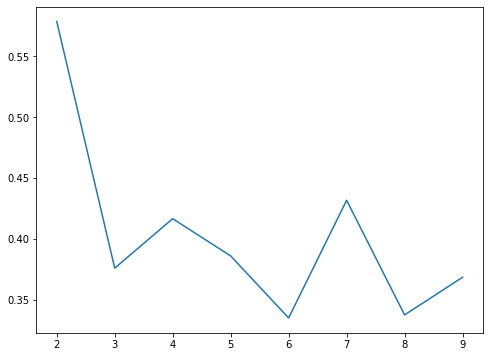

[<matplotlib.lines.Line2D at 0x7fbf5c5a8d90>]

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)


As per the plot above, the sillhouette score is quite unstable thus our clustering is not providing any fruitful results. 

Therefore we will need to drop the idea of using the clustering to expand our research on covid deaths and diets metrics.

# Regression ( Machine Learning)
So far, clustering didn't work for our dataset. Next most common apporach to predict the values on the basis of correlations are regression algorithms. In our case, we will attempt to perform two regression algorithms here.


*   Linear Regressor
*   Random Forest Regressor

We will start with basics steps of converting the columns into vectors and then scale and encode them.

In [0]:

features = ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed',  'Recovered', 'Active']
vector_col = "features"
assembler = VectorAssembler(inputCols=features, outputCol=vector_col)
# food_kg_drop = assembler.transform(food_kg_drop)
food_kg_drop.show()

+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex| CountryVec|
+------------------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+-----------------+
 Chad| 0.8297| 0.2023| 12.2804| 0.0| 21.6017|0.0495| 1.0451| 1.0669|3.8543| 5.9037| 0.064|1.2256| 3.0304|1.4133| 0.0| 6.991| 0.0087| 1.3449| 0.0| 0.0| 0.4556| 0.9141| 37.7189| 4.8| 37.5| 1.6877E7|0.004183179487179487|2.779487179487179E-4|0.003500230769230769|4.050000000000000...| 0.0| 0.0|[0.8297,0.2023,12...|[0.35123345500525...| 26.0| (150,[26],[1.0])|
Russian Federation| 3.7425| 0.2486| 16.1525| 0.0023| 8.2803|0.9029| 1.1312| 3.162| 4.318| 9.3253| 0.0118|0.2249| 0.1319|0.1426|0.0118| 6.3194| 0.1809| 4.6144| 0.0| 0.0118| 0.8663| 6.3713| 33.8472| 25.7| 2.5| 1.46733E8| 4.590614871794871| 0.07837703846153846| 3.4976030384615386| 1.0146347948717949| 2.0| 4.0|[3.7425,0.2486,16...|[1.58429698126693...| 113.0|(150,[113],[1.0])|
 Paraguay| 3.9095| 0.2191| 11.2654| 0.0| 7.5639|0.9035| 0.3119| 5.4532|4.0434| 5.3208| 0.1788|0.4675| 0.2745|0.6185|0.0082| 12.5302| 1.0112| 2.4084| 0.0| 0.0015| 1.0733| 3.7113| 38.726| 19.0| 10.7| 7255000.0| 0.1331937564102564| 0.0027625| 0.093116| 0.03731525641025641| 0.0| 0.0|[3.9095,0.2191,11...|[1.65499239766548...| 107.0|(150,[107],[1.0])|
 Yemen| 0.0364| 0.0446| 5.7874| 0.0| 27.2077|0.2579| 0.524| 5.1344|2.7871| 1.8911| 0.2033|0.2827| 0.0893|0.8645|0.0347| 1.0794| 0.2199| 5.0468| 0.0| 0.0017| 1.0811| 3.2135| 44.2126| 14.1| 38.9| 2.9826E7|0.005414397435897436|0.001545551282051...|0.003171128205128...|6.977179487179486E-4| 0.0| 0.0|[0.0364,0.0446,5....|[0.01540906081980...| 147.0|(150,[147],[1.0])|
 Senegal| 0.3209| 0.0353| 5.3434| 0.0| 25.9204|0.1878| 2.0588| 2.3456|1.6081| 1.2496| 0.0148| 0.206| 0.7637|0.4712|0.0717| 2.6177| 0.1161| 2.0941| 0.0| 0.1047| 1.9325| 7.8951| 44.6423| 7.4| 11.3| 1.6744E7| 0.0411215641025641|8.253589743589744E-4| 0.03363914102564102|0.006657064102564102| 0.0| 0.0|[0.3209,0.0353,5....|[0.13584526420535...| 119.0|(150,[119],[1.0])|
 Sweden| 4.4232| 1.0442| 24.0627| 0.0| 6.1923|0.7266| 1.7659| 3.5405|4.1476| 16.3687| 0.4623|0.0086| 0.1712|0.0937|0.0484| 2.8343| 0.5533| 2.5211| 0.0| 0.0996| 0.3967| 4.611| 25.9282| 22.1| 2.5| 1.0377E7| 0.5037826282051282|0.020759615384615387|0.002052089743589...| 0.4809709230769231| 0.0| 2.0|[4.4232,1.0442,24...|[1.87245488511419...| 130.0|(150,[130],[1.0])|
 Cabo Verde| 3.9814| 0.0363| 9.7559| 0.0029| 14.7961|0.4602| 1.0598| 4.6402|3.0725| 5.0192| 1.119| 0.105| 0.5394| 1.139|0.2731| 3.843| 0.1671| 2.1396| 0.0| 0.0258| 0.9471| 6.6338| 40.2437| 10.6| 12.6| 556000.0|0.0186

## Linear Regression
The most basic and commonly used predictive analysis is Linear Regression. The basic idea behind the linear regression is to


*   determine if predictor variables are capable to predict dependent variable values
*   identify the variables that are more significant in predicting the dependent variable.

It is used to find the relationship between one dependent
variable with the one or more independent variables and is
defined by the formula y = m*x + c, where y is the dependant
variable, c is the constant, b is the regression coefficient and
x is the score on the independent variable.

In [0]:
from pyspark.ml.regression import LinearRegression
#spliting the dataset into training and testing
train_sdf, test_sdf = food_kg_drop.randomSplit([.80, .20])

# initialising linear regression model
lr = LinearRegression(featuresCol = 'features', labelCol='Deaths', maxIter=10, regParam=0.3)
lr_model = lr.fit(train_sdf) # fitting detaset with training data


In [0]:
predictions = lr_model.transform(test_sdf) #predicting testing dataset values
predictions.select("prediction","Deaths","features").show(5)

+--------------------+--------------------+--------------------+
 prediction| Deaths| features|
+--------------------+--------------------+--------------------+
0.006777105187454472|0.004366205128205...|[0.0014,0.1973,9....|
0.021326459650554283|0.001434461538461...|[1.6719,0.1357,18...|
0.016121155268797704|0.005526923076923077|[0.2711,0.0282,9....|
 0.02929979211162005|0.001925858974358...|[5.5436,0.3143,21...|
0.030641996904651504|0.006205910256410257|[7.0215,0.8555,19...|
+--------------------+--------------------+--------------------+
only showing top 5 rows

In [0]:
# evaluate the performance of regressor
from pyspark.ml.evaluation import RegressionEvaluator

# Compute RMSr on the test set
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Deaths",metricName="r2")
test_rmse_orig = lr_evaluator.evaluate(predictions)

In [0]:
test_rmse_orig

Out[66]: -1.419611728468805

## Random Forest

Random forest is a Supervised Learning algorithm [10] that
uses an aggregate training method for ranking and regression.
It functions by forming a plenitude of decision trees at training
time and outputting the class that is the mean prediction of
the singular tree. It consolidates the outcomes of multiple
predictions which aggregates many decision trees, with some
helpful modifications. In predicting the mortality rate, random
forest proved to be way better than the linear regression. After
training and fitting the model, the prediction is accurate up to
76

In [0]:
from pyspark.ml.regression import RandomForestRegressor
# Random forest model instance intiated
rf = RandomForestRegressor(featuresCol="features", labelCol='Deaths')
# pipeline = Pipeline(stages=[ rf])
model =rf.fit(train_sdf)
rf_test_predictions = model.transform(test_sdf)
rf_test_predictions.show()

+-----------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+----------------+--------------------+
 Country|Alcoholic Beverages|Animal fats|Animal Products|Aquatic Products, Other|Cereals - Excluding Beer| Eggs|Fish, Seafood|Fruits - Excluding Wine| Meat|Milk - Excluding Butter|Miscellaneous|Offals|Oilcrops|Pulses|Spices|Starchy Roots|Stimulants|Sugar & Sweeteners|Sugar Crops|Treenuts|Vegetable Oils|Vegetables|Vegetal Products|Obesity|Undernourished|Population| Confirmed| Deaths| Recovered| Active|DeathScore|ConfirmedScore| features| scaledFeatures|CountryIndex| CountryVec| prediction|
+-----------+-------------------+-----------+---------------+-----------------------+------------------------+------+-------------+-----------------------+------+-----------------------+-------------+------+--------+------+------+-------------+----------+------------------+-----------+--------+--------------+----------+----------------+-------+--------------+----------+--------------------+--------------------+--------------------+--------------------+----------+--------------+--------------------+--------------------+------------+----------------+--------------------+
Afghanistan| 0.0014| 0.1973| 9.4341| 0.0| 24.8097|0.2099| 0.035| 5.3495| 1.202| 7.5828| 0.0728|0.2057| 0.07|0.2953|0.0574| 0.8802| 0.3078| 1.3489| 0.0| 0.077| 0.5345| 6.7642| 40.5645| 4.5| 29.8| 3.8928E7| 0.12175905128205128|0.004366205128205...| 0.08761985897435896| 0.02977298717948718| 0.0| 0.0|[0.0014,0.1973,9....|[5.92656185377075...| 0.0| (150,[0],[1.0])|0.002491120506548708|
 Albania| 1.6719| 0.1357| 18.7684| 0.0| 5.7817|0.5815| 0.2126| 6.7861|1.8845| 15.7213| 0.1123|0.2324| 0.9377| 0.238|8.0E-4| 1.8096| 0.1055| 1.5367| 0.0| 0.1515| 0.3261| 11.7753| 31.2304| 22.3| 6.2| 2838000.0| 0.06325552564102564|0.001434461538461...|0.034801884615384616| 0.02701917948717949| 0.0| 0.0|[1.6719,0.1357,18...|[0.70775848309423...| 1.0| (150,[1],[1.0])|0.001523261331731651|
 Algeria| 0.2711| 0.0282| 9.6334| 0.0| 13.6816|0.5277| 0.2416| 6.3801|1.1305| 7.6189| 0.1671| 0.087| 0.3493|0.4783|0.0557| 4.134| 0.2216| 1.8342| 0.0| 0.1152| 1.031| 11.6484| 40.3651| 26.6| 3.9| 4.4357E7| 0.16056189743589744|0.005526923076923077| 0.10842846153846154| 0.04660651282051282| 0.0| 0.0|[0.2711,0.0282,9....|[0.11476363703980...| 2.0| (150,[2],[1.0])|0.003689513990728...|
 Australia| 5.5436| 0.3143| 21.4175| 0.0033| 5.4979|0.4428| 1.4264| 4.1883|6.7049| 12.1018| 0.5293| 0.424| 0.3694|0.0546|0.0458| 2.7884| 0.2928| 2.5364| 0.0| 0.3176| 1.2798| 5.1406| 28.5806| 30.4| 2.5| 2.5754E7| 0.07223683333333333|0.001925858974358...| 0.06097402564102564|0.009336948717948717| 0.0| 0.0|[5.5436,0.3143,21...|[2.34674916375453...| 6.0| (150,[6],[1.0])|0.002487097063638...|
 Austria| 7.0215| 0.8555| 19.5654| 0.0011| 6.2116|0.7884| 0.7562| 4.6069| 4.681| 12.3776| 5.0E-4|0.1052| 0.2683|0.0456|0.0494| 3.0548| 0.4106| 2.6094| 0.0| 0.2367| 0.8109| 5.1098| 30.4338| 21.9| 2.5| 8914000.0| 0.3765586153846154|0.006205910256410257| 0.3129698205128205| 0.05738288461538462| 0.0| 2.0|[7.0215,0.8555,19...|[2.97238243258938...| 7.0| (150,[7],[1.0])| 0.01033535486453704|
 Bangladesh| 0.0031| 0.0156| 5.1926| 0.0| 29.8045|0.2957| 2.5221| 2.8655|0.4191| 1.8778| 0.0197|0.0633| 0.082|0.7065|0.3195| 5.3378| 0.0529| 0.9285| 0.195| 0.0934| 0.7615| 3.6405| 44.8033| 3.4| 14.7| 1.69809E8| 1.0093570897435897|0.014312243589743591| 0.7512643461538462| 0.24378049999999998| 0.0| 4.0|[0.0031,0.0156,5....|[0.00131231012476...| 9.0| (150,[9],[1.0])| 0.0220042624030807|
 Barbados| 3.565| 0.2212| 12.497

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluator for Random forest regression 

Reg_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Deaths",metricName="r2")
print("R2 value on test data", Reg_evaluator.evaluate(rf_test_predictions))
rmse_rf = Reg_evaluator.evaluate(rf_test_predictions)
rf_train_predictions = model.transform(train_sdf)
train_rmse_rf = Reg_evaluator.evaluate(rf_train_predictions)
print("Root mean square value of test data", rmse_rf)
print("Root mean square value of training data", train_rmse_rf)

answer = [train_rmse_rf,  rmse_rf]
print('check_rf_spark', answer)

R2 value on test data 0.23880057886893258
Root mean square value of test data 0.23880057886893258
Root mean square value of training data 0.9429521318262503
check_rf_spark [0.9429521318262503, 0.23880057886893258]

# Learing curves
 Now the next step is to callculate the features which played significant role in predicitng the values while performing Random Forest Regression. To achieve this, we will create a method which will provide the important features by sorting and calculating the features with higher score. It will also return the score of each feature in descending order.

In [0]:
# method to return score of most important features
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [0]:
impfeatures = ExtractFeatureImp(model.featureImportances, train_sdf, "features").head(10)
impfeatures

Out[70]:

,idx,name,score
25,25,Deaths,0.291990
24,24,Confirmed,0.212398
27,27,Active,0.105496
26,26,Recovered,0.066662
22,22,Obesity,0.041019
10,10,Miscellaneous,0.038038
0,0,Alcoholic Beverages,0.037329
14,14,Starchy Roots,0.027094
11,11,Offals,0.026781
21,21,Vegetal Products,0.026489


Out[71]:

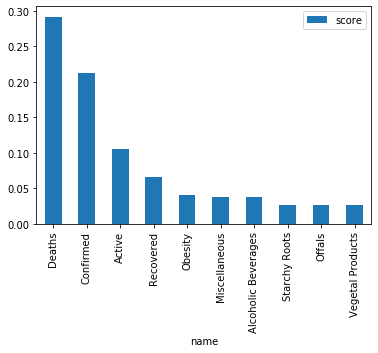

<matplotlib.axes._subplots.AxesSubplot at 0x7fbf5c4eb450>

In [0]:
impfeatures.plot(x="name", y="score", kind="bar") #bar graph between features and their score

It is vissible from the graph that Deaths, confirmed, active and miscelaneous played the most important role in the prediction. Moreover, we cannot ignore the Alcoholic beverages and cereals which also played significant role.

# Results
 For visualizations, we will convert our dataset to pandas and plot pie chart in different contexts to infer some conclusions on the basis if it.

So far we derived that obesity and undernutrition correlate with covid cases. But now we are going to analyze this in more depth and detail picking one at a time.

**Obesity average diet:**

Now we will pic top 10 countries with higher obesity rate and then we will plot a pie chart of food diet available and consumed by the population of those countries.

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.

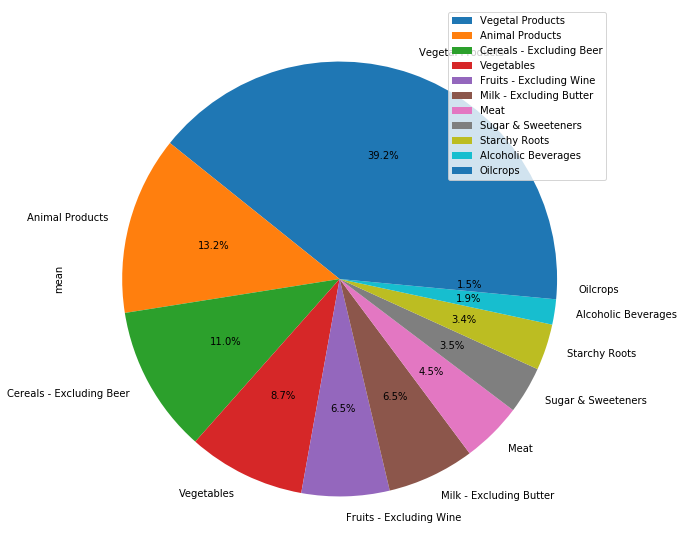

In [0]:
# top ten obese countries data
food_kg = food_kg_drop.toPandas()
obesity_set = food_kg[food_kg['Obesity'] == food_kg['Obesity']].sort_values(by='Obesity', ascending=False).head(10)
obesity_mean = obesity_set.describe().iloc[1]
#droping unwanted columnns
obesity_mean = pd.DataFrame(obesity_mean).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active', 'ConfirmedScore','DeathScore', 'CountryIndex'], axis=0)
obesity_mean = obesity_mean.sort_values(by='mean', ascending=False).iloc[:11]

#plotting pie chart
obesity_mean_plot = obesity_mean.plot.pie(subplots=True, figsize=(25, 10), autopct='%1.1f%%')

The graph depicts that the countries with more obesity rate consumes more vegetable products.

**Undernourished Average Diet**

Again we will pic top 10 countries with higher obesity rate and then we will plot a pie chart of food diet available and consumed by the population of those countries.

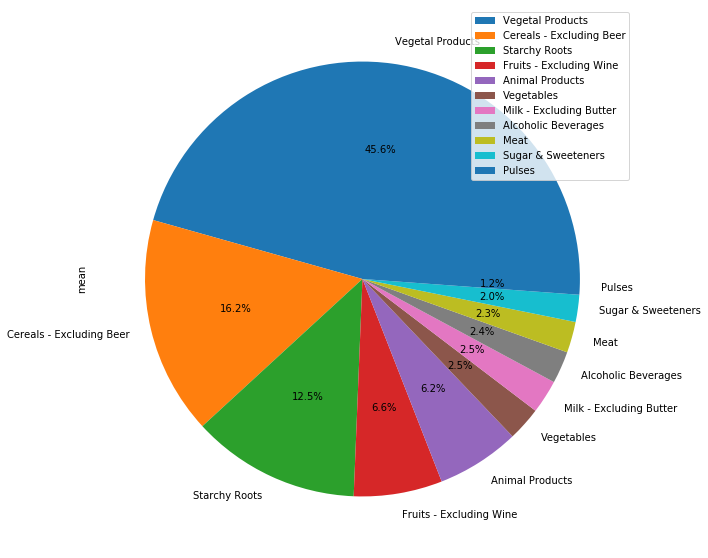

In [0]:
#average diet of undernourshed countries
undernutrition_set = food_kg[food_kg['Undernourished'] == food_kg['Undernourished']].sort_values(by='Undernourished', ascending=False).head(10)
undernutrition_mean = undernutrition_set.describe().iloc[1]
undernutrition_mean = pd.DataFrame(undernutrition_mean).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active', 'ConfirmedScore','DeathScore', 'CountryIndex'], axis=0)
undernutrition_mean = undernutrition_mean.sort_values(by='mean', ascending=False).iloc[:11]
undernutrition_mean_plot = undernutrition_mean.plot.pie(subplots=True, figsize=(25, 10), autopct='%1.1f%%')

Here we can see the difference if we compre the results with the world average diet we plotted in early visualizations. It clearly shows that people who are undernourished consume less meat and animal products but more starchy roots in addition to vegetal products. This could be the reason why being undernourished, the people here have the immunity from the virus.

**Extreme Covid Results**

Now we will circle back to our extreme countires calculated ealrier on the both ends. We are going to study these countires one by one and try to deduct the pattern.

**1. United States with most deaths and confirmed cases**

United states ranks twice in the top extreme in both the categories of maximum deaths and maximum cases. Let us plot the nutritional plot of the country to analyse.

In [0]:
united_states = food_kg[food_kg['Deaths'] == food_kg['Deaths'].max()]
united_states

Out[74]:

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Confirmed,Deaths,Recovered,Active,DeathScore,ConfirmedScore,features,scaledFeatures,CountryIndex,CountryVec
65,United States of America,4.8647,0.1681,21.2352,0.002,5.5048,0.786,1.1287,4.5432,6.2645,12.8657,0.0,0.0197,0.3246,0.1893,0.049,2.839,0.2458,3.32,0.0,0.1772,0.9889,5.7249,28.7587,37.3,2.5,329878000.0,27.571274,0.68691,6.453474,20.43089,4.0,4.0,"[4.8647, 0.1681, 21.2352, 0.002, 5.5048, 0.786...","[2.059353246431327, 0.5908169594804232, 3.5559...",142.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


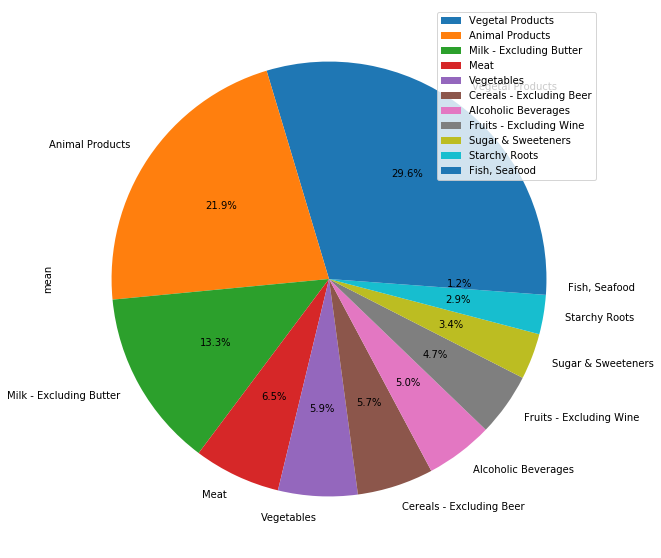

In [0]:
united_diet = pd.DataFrame(united_states.describe().iloc[1]).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active', 'ConfirmedScore','DeathScore', 'CountryIndex'], axis=0)
united_diet = united_diet.sort_values(by='mean', ascending=False).iloc[:11]
united_diet_plot = united_diet.plot.pie(subplots=True, figsize=(25, 10), autopct='%1.1f%%')

Americans consume more Animal Products, Milk- excluding butter and Alcoholic beverages s compared to an average of the world. Obesity is the record high in the country which indicates the primary factor of more infections and deaths in the country.

In [0]:
us_diet = food_kg[food_kg['Confirmed'] == food_kg['Confirmed'].max()]
us_diet

Out[76]:

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Confirmed,Deaths,Recovered,Active,DeathScore,ConfirmedScore,features,scaledFeatures,CountryIndex,CountryVec
65,United States of America,4.8647,0.1681,21.2352,0.002,5.5048,0.786,1.1287,4.5432,6.2645,12.8657,0.0,0.0197,0.3246,0.1893,0.049,2.839,0.2458,3.32,0.0,0.1772,0.9889,5.7249,28.7587,37.3,2.5,329878000.0,27.571274,0.68691,6.453474,20.43089,4.0,4.0,"[4.8647, 0.1681, 21.2352, 0.002, 5.5048, 0.786...","[2.059353246431327, 0.5908169594804232, 3.5559...",142.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**2. Vanuatu: less confirmed cases relative to its population**

Vanuatu has significantly high obesity rate i.e. 23.5% but its mortality rate is lowest in the list.

In [0]:
vanuatu_diet = food_kg[food_kg['Confirmed'] == food_kg['Confirmed'].min()].sort_values(by='Population', ascending=False)
vanuatu_diet 

Out[77]:

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Confirmed,Deaths,Recovered,Active,DeathScore,ConfirmedScore,features,scaledFeatures,CountryIndex,CountryVec
149,Vanuatu,0.2424,0.0793,6.6244,0.0,6.4102,0.1875,2.1649,5.8103,2.7466,1.2692,0.2882,0.1776,12.1763,0.0008,0.0374,12.7275,0.0305,1.3645,0.0,0.0038,0.3674,3.9175,43.3737,23.5,7.2,321000.0,9.102564e-07,0.0,6.153846e-07,2.948718e-07,0.0,0.0,"[0.2424, 0.0793, 6.6244, 0.0, 6.4102, 0.1875, ...","[0.10261418523957361, 0.2787137708911217, 1.10...",145.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


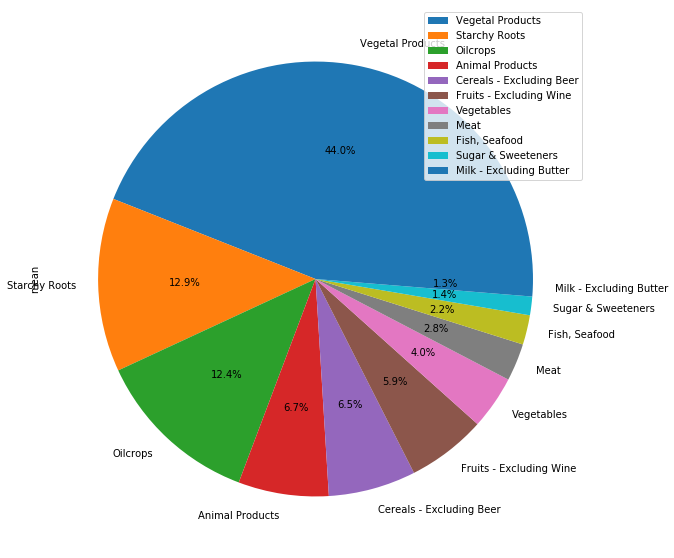

In [0]:
vanuatu_diet  = pd.DataFrame(vanuatu_diet.describe().iloc[1]).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active', 'ConfirmedScore','DeathScore', 'CountryIndex'], axis=0)
vanuatu_diet  = vanuatu_diet.sort_values(by='mean', ascending=False).iloc[:11]
vanuatu_diet_plot = vanuatu_diet.plot.pie(subplots=True, figsize=(25, 10), autopct='%1.1f%%')

So people here consume way less animal products as compared to United States. They consumes more more starchy roots likes carrots, reddish, turnips and others.

**3. Cambodia: Least deaths relative to its population**

Cambodia has very low obesity rate but high undernourishment rate.

In [0]:
cambodia_diet = food_kg[food_kg['Deaths'] == food_kg['Deaths'].min()].sort_values(by='Population', ascending=False)
cambodia_diet

Out[179]:

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Confirmed,Deaths,Recovered,Active,DeathScore,ConfirmedScore,features,scaledFeatures,CountryIndex,CountryVec
16,Cambodia,4.5783,0.0377,6.0800,0.0000,24.8906,0.1310,4.2369,2.3184,1.2247,0.3285,0.4853,0.1211,0.7900,0.4903,0.0784,3.0519,0.1260,2.9923,0.8367,0.0238,0.2511,3.0072,43.9195,3.5,16.4,15497000.0,9.111667e-04,0.0,8.307436e-04,8.042308e-05,0.0,0.0,"[4.5783, 0.0377, 6.08, 0.0, 24.8906, 0.131, 4....","[1.9381127239370453, 0.13250326812856605, 1.01...",22.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
46,Timor-Leste,0.4459,0.0897,5.4983,0.0000,26.3320,0.1025,1.0225,2.1027,4.0376,0.1307,0.8905,0.1153,0.5612,0.9098,0.0500,5.5022,1.0136,2.8203,0.0000,0.0013,0.6842,3.1867,44.5030,2.9,24.9,1318000.0,1.021282e-04,0.0,9.271795e-05,9.410256e-06,0.0,0.0,"[0.4459, 0.0897, 5.4983, 0.0, 26.332, 0.1025, ...","[0.18876099504259847, 0.31526639658176064, 0.9...",133.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
148,Solomon Islands,0.8298,0.1038,3.8504,0.0121,9.0233,0.0826,2.2840,3.2798,0.8897,0.4380,0.5585,0.0394,5.0334,0.7366,0.0364,24.2500,0.0856,0.8268,0.0000,0.0356,0.3327,1.1223,46.1492,20.5,8.9,715000.0,1.788462e-05,0.0,6.320513e-06,1.156410e-05,0.0,0.0,"[0.8298, 0.1038, 3.8504, 0.0121, 9.0233, 0.082...","[0.35127578758992645, 0.36482332179695376, 0.6...",124.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
149,Vanuatu,0.2424,0.0793,6.6244,0.0000,6.4102,0.1875,2.1649,5.8103,2.7466,1.2692,0.2882,0.1776,12.1763,0.0008,0.0374,12.7275,0.0305,1.3645,0.0000,0.0038,0.3674,3.9175,43.3737,23.5,7.2,321000.0,9.102564e-07,0.0,6.153846e-07,2.948718e-07,0.0,0.0,"[0.2424, 0.0793, 6.6244, 0.0, 6.4102, 0.1875, ...","[0.10261418523957361, 0.2787137708911217, 1.10...",145.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
109,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,1.9647,0.7751,0.1398,10.5187,0.0000,0.0582,7.6944,0.1344,2.0811,0.0036,0.0108,0.5117,1.1656,38.8349,45.5,2.7,200000.0,1.500000e-06,0.0,1.128205e-06,3.717949e-07,0.0,0.0,"[1.4236, 0.2262, 11.163, 0.1236, 3.6768, 0.131...","[0.602646675359146, 0.7950196087713964, 1.8693...",116.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
25,Dominica,0.9410,0.0319,8.9011,0.0000,3.4014,0.1244,1.4188,19.3028,2.7820,4.4217,0.6745,0.1219,1.1058,0.2255,0.1512,6.8477,0.2553,3.1738,0.0000,0.0035,0.3797,4.6371,41.0989,28.2,6.2,72000.0,1.431795e-04,0.0,1.190513e-04,2.412821e-05,0.0,0.0,"[0.941, 0.0319, 8.9011, 0.0, 3.4014, 0.1244, 1...","[0.39834962174273414, 0.1121181499549405, 1.49...",36.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


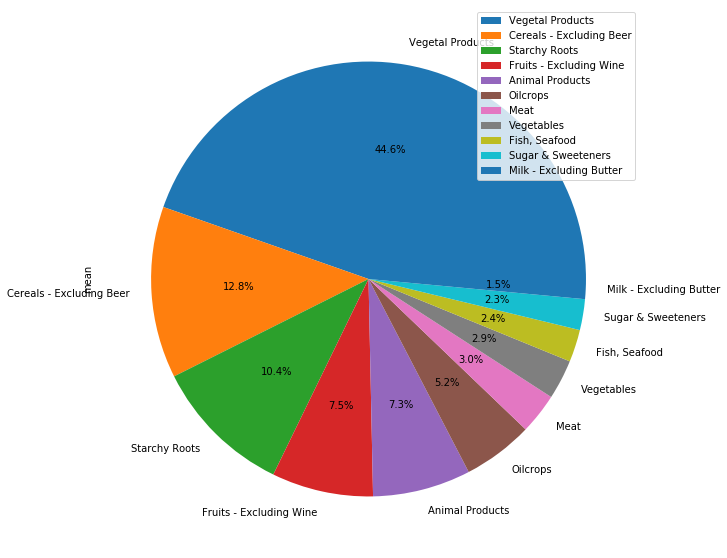

In [0]:
cambodia_diet = pd.DataFrame(cambodia_diet.describe().iloc[1]).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active', 'ConfirmedScore','DeathScore', 'CountryIndex'], axis=0)
cambodia_diet = cambodia_diet.sort_values(by='mean', ascending=False).iloc[:11]
cambodia_diet_plot = cambodia_diet.plot.pie(subplots=True, figsize=(25, 10), autopct='%1.1f%%')

If we closely observe the dietary structure of Cambodian people, they mainly rely on vegetable products and cereals. Surprisingly, they rely more on starchy food and cereals than animal products and meat.

# Conclusion

In conclusion, now we have executed ML algorithms and
studied the pie charts above, we can deduce some key points.
Firstly, the Pearson Correlation Coefficient plot shows that
obesity has a stronger correlation with covid deaths than any
other factor and undernourishment has a significant correlation
with the recovery rates altogether. Furthermore, other than
animal products, alcoholic beverages could also be the reason
for the high fatality rate in the United States. But we do not
have concrete outcomes to confirm this which creates the scope
of research.